# EDA

In [ ]:
# 구글 드라이브 연결(데이터 로드를 위해서)
from google.colab import drive

drive.mount('/content/data')
file_path = '/content/data/MyDrive/Colab Notebooks/ai_study/churn/WA_Fn-UseC_-Telco-Customer-Churn.csv'

Mounted at /content/data


In [ ]:
import pandas as pd

# Load the dataset
file_path = '/content/data/MyDrive/Colab Notebooks/ai_study/churn/WA_Fn-UseC_-Telco-Customer-Churn.csv'
telco_data = pd.read_csv(file_path)

In [ ]:
telco_data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


- customerID: 고객 고유 ID
- tenure: 가입 기간 (월 기준)

- 고객 정보
  - gender: 성별
  - SeniorCitizen: 고령자 여부 (0: 아니오, 1: 예)
  - Partner: 배우자 여부
  - Dependents: 부양가족 여부
- 서비스
  - PhoneService: 전화 서비스 이용 여부
  - MultipleLines: 다중 전화 회선 이용 여부
  - InternetService: 인터넷 서비스 유형 (DSL, Fiber optic, - None)
  - OnlineSecurity, OnlineBackup, DeviceProtection, TechSupport: 각종 추가 서비스 이용 여부
  - StreamingTV, StreamingMovies: 스트리밍 서비스 이용 여부
- 계약 정보
  - Contract: 계약 유형 (월별, 1년, 2년)
  - PaperlessBilling: 무서류 청구서 여부
  - PaymentMethod: 결제 방법
  - MonthlyCharges: 월 요금
  - TotalCharges: 총 요금
  
- Churn: 이탈 여부 (Yes: 이탈, No: 유지)

In [ ]:
# Check for missing values and data types
data_info = telco_data.info()

# Check for any missing or null values in the dataset
missing_values = telco_data.isnull().sum()

# Summary statistics of numerical columns
summary_statistics = telco_data.describe()

# Display the results
data_info, missing_values, summary_statistics

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


(None,
 customerID          0
 gender              0
 SeniorCitizen       0
 Partner             0
 Dependents          0
 tenure              0
 PhoneService        0
 MultipleLines       0
 InternetService     0
 OnlineSecurity      0
 OnlineBackup        0
 DeviceProtection    0
 TechSupport         0
 StreamingTV         0
 StreamingMovies     0
 Contract            0
 PaperlessBilling    0
 PaymentMethod       0
 MonthlyCharges      0
 TotalCharges        0
 Churn               0
 dtype: int64,
        SeniorCitizen       tenure  MonthlyCharges
 count    7043.000000  7043.000000     7043.000000
 mean        0.162147    32.371149       64.761692
 std         0.368612    24.559481       30.090047
 min         0.000000     0.000000       18.250000
 25%         0.000000     9.000000       35.500000
 50%         0.000000    29.000000       70.350000
 75%         0.000000    55.000000       89.850000
 max         1.000000    72.000000      118.750000)

- 데이터에는 7043개의 레코드와 21개의 열이 있다.
- 결측치는 없으며, 모든 열이 값이 잘 채워져 있다.
- TotalCharges 열은 원래는 숫자형 값이어야 할 것으로 예상되지만, 현재는 object 타입으로 저장되어 있어 추가 처리가 필요할 수 있다.
- MonthlyCharges와 tenure는 각각 월 요금과 가입 기간에 대한 수치형 변수이며, SeniorCitizen은 0과 1로 고령 여부를 나타내고 있다.

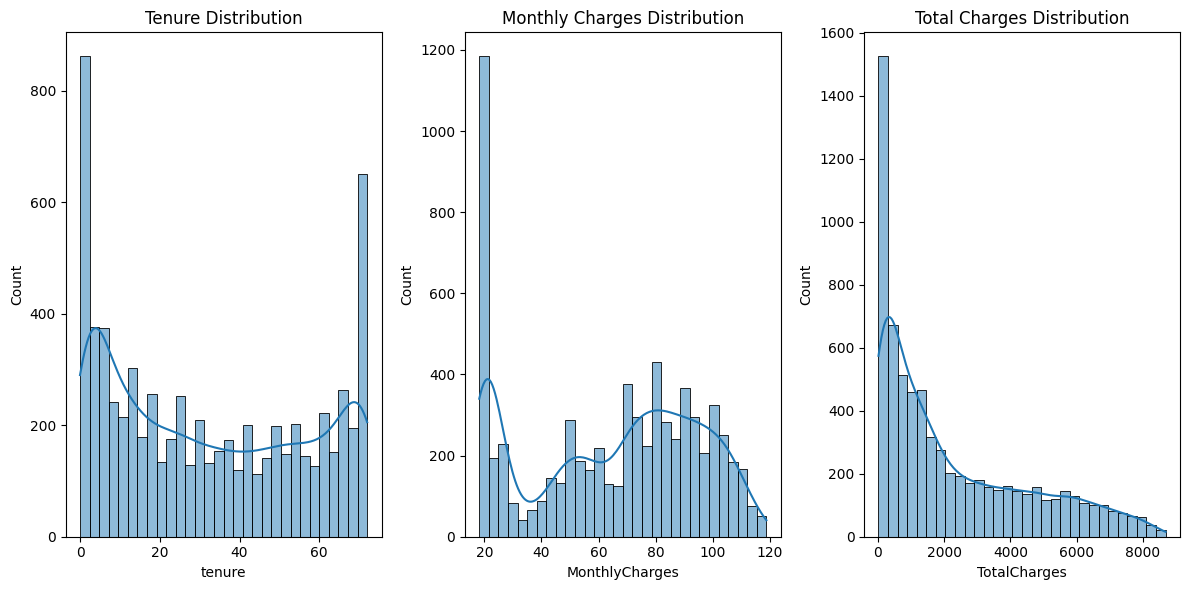

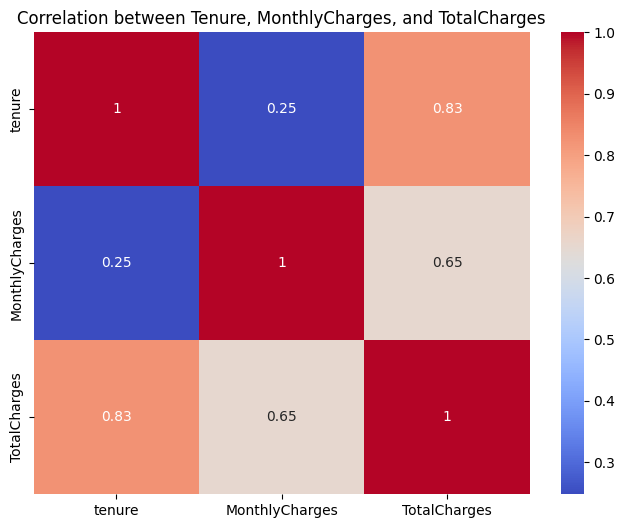

11

In [ ]:
# Convert 'TotalCharges' to numeric, coercing errors to NaN
telco_data['TotalCharges'] = pd.to_numeric(telco_data['TotalCharges'], errors='coerce')

# Check for any missing values after the conversion
missing_after_conversion = telco_data['TotalCharges'].isnull().sum()

# Fill missing values in 'TotalCharges' with the median
telco_data['TotalCharges'].fillna(telco_data['TotalCharges'].median(), inplace=True)

# Display distribution plots and basic correlations for numerical columns
import matplotlib.pyplot as plt
import seaborn as sns

# Set up the matplotlib figure
plt.figure(figsize=(12, 6))

# Distribution plots for tenure, MonthlyCharges, and TotalCharges
plt.subplot(1, 3, 1)
sns.histplot(telco_data['tenure'], kde=True, bins=30)
plt.title('Tenure Distribution')

plt.subplot(1, 3, 2)
sns.histplot(telco_data['MonthlyCharges'], kde=True, bins=30)
plt.title('Monthly Charges Distribution')

plt.subplot(1, 3, 3)
sns.histplot(telco_data['TotalCharges'], kde=True, bins=30)
plt.title('Total Charges Distribution')

plt.tight_layout()
plt.show()

# Correlation heatmap for numerical features
plt.figure(figsize=(8, 6))
sns.heatmap(telco_data[['tenure', 'MonthlyCharges', 'TotalCharges']].corr(), annot=True, cmap='coolwarm')
plt.title('Correlation between Tenure, MonthlyCharges, and TotalCharges')
plt.show()

missing_after_conversion

- 가입 기간(tenure), 월 요금(MonthlyCharges), **총 요금(TotalCharges)**의 분포를 시각화한 결과, 각 변수는 다양한 분포를 보인다.
- 특히 MonthlyCharges와 TotalCharges는 다소 오른쪽으로 긴 꼬리를 가진 분포를 보여, 일부 고객들이 높은 요금을 지불하고 있음을 알 수 있다.
- tenure, MonthlyCharges, TotalCharges 간의 상관관계를 분석한 결과, TotalCharges는 tenure와 상당히 높은 상관관계를 보이고 있지만, MonthlyCharges와의 상관관계는 상대적으로 낮다.

In [ ]:
import plotly.express as px
import plotly.subplots as sp

# Set up subplot
fig = sp.make_subplots(rows=1, cols=3, subplot_titles=['Churn vs Tenure', 'Churn vs Monthly Charges', 'Churn vs Total Charges'])

# Churn vs Tenure
tenure_plot = px.box(telco_data, x='Churn', y='tenure', title='Churn vs Tenure')
for trace in tenure_plot['data']:
    fig.append_trace(trace, row=1, col=1)

# Churn vs Monthly Charges
monthly_charges_plot = px.box(telco_data, x='Churn', y='MonthlyCharges', title='Churn vs Monthly Charges')
for trace in monthly_charges_plot['data']:
    fig.append_trace(trace, row=1, col=2)

# Churn vs Total Charges
total_charges_plot = px.box(telco_data, x='Churn', y='TotalCharges', title='Churn vs Total Charges')
for trace in total_charges_plot['data']:
    fig.append_trace(trace, row=1, col=3)

# Update layout
fig.update_layout(height=800, width=1500, title_text="Churn vs Key Variables")
fig.show()

Churn(이탈) 여부와 주요 변수 간의 관계를 시각화한 결과, 다음과 같은 패턴을 발견할 수 있다:

1. 가입 기간(tenure): 이탈 고객은 비교적 짧은 가입 기간을 가진 경향이 있습니다. 반면, 오래된 고객들은 이탈 확률이 낮은 것으로 보입니다.
2. 월 요금(MonthlyCharges): 이탈 고객의 월 요금이 더 높은 경향을 보이고 있습니다.
3. 총 요금(TotalCharges): 이탈 고객은 총 요금이 상대적으로 낮은 편입니다. 이는 이탈 고객이 주로 가입 기간이 짧고, 따라서 총 요금이 적기 때문으로 해석할 수 있습니다.

In [ ]:
import plotly.express as px

# Contract vs Churn
contract_churn = px.histogram(telco_data, x="Contract", color="Churn", barmode="group", title="Contract vs Churn")
contract_churn.show()

# Internet Service vs Churn
internet_churn = px.histogram(telco_data, x="InternetService", color="Churn", barmode="group", title="Internet Service vs Churn")
internet_churn.show()

# Payment Method vs Churn
payment_churn = px.histogram(telco_data, x="PaymentMethod", color="Churn", barmode="group", title="Payment Method vs Churn")
payment_churn.show()

# Tech Support vs Churn
tech_support_churn = px.histogram(telco_data, x="TechSupport", color="Churn", barmode="group", title="Tech Support vs Churn")
tech_support_churn.show()

In [ ]:
import plotly.express as px
import plotly.subplots as sp
from plotly.graph_objs import Bar

# List of important categorical variables to analyze
categorical_features = ['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'PhoneService',
                        'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup',
                        'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies',
                        'Contract', 'PaperlessBilling', 'PaymentMethod']

# Set up a subplot
fig = sp.make_subplots(rows=6, cols=3, subplot_titles=categorical_features, vertical_spacing=0.1)

# Plot each categorical feature against 'Churn'
row, col = 1, 1
for feature in categorical_features:
    churn_counts = telco_data.groupby([feature, 'Churn']).size().reset_index(name='counts')
    churn_plot = px.bar(churn_counts, x=feature, y='counts', color='Churn')

    for trace in churn_plot['data']:
        fig.append_trace(trace, row=row, col=col)

    col += 1
    if col > 3:
        col = 1
        row += 1

# Update layout
fig.update_layout(height=2000, width=1600, title_text="Categorical Features vs Churn", showlegend=False)
fig.show()

- InternetService(인터넷 서비스): Fiber optic 서비스를 사용하는 고객들이 DSL이나 인터넷을 사용하지 않는 고객들에 비해 이탈율이 더 높다.
- Contract(계약 유형): 월별 계약을 이용하는 고객들이 장기 계약(1년 또는 2년) 고객에 비해 이탈율이 훨씬 높다. 이탈을 줄이기 위해 장기 계약을 유도하는 전략이 효과적일 수 있다.
- PaymentMethod(결제 방법): 전자 수표(Electronic Check)를 사용하는 고객들의 이탈율이 상대적으로 높다. 반면, 자동 이체나 신용카드를 사용하는 고객의 이탈율은 낮다.
- TechSupport(기술 지원), OnlineSecurity(온라인 보안 서비스): 기술 지원이나 보안 서비스를 이용하는 고객들은 이탈율이 낮은 경향을 보인다.
- 이 외에도 **PaperlessBilling(무서류 청구서)**를 사용하는 고객들의 이탈율이 다소 높다는 점도 확인할 수 있다.

# Import

In [1]:
%%writefile utils.py

import os
import random
import numpy as np
import torch

def reset_seeds(func, seed=42):
  random.seed(seed)
  os.environ['PYTHONHASHSEED'] = str(seed) # 파이썬 환경변수 시드 고정
  np.random.seed(seed)
  torch.manual_seed(seed) # cpu 연산 무작위 고정
  torch.cuda.manual_seed(seed) # gpu 연산 무작위 고정
  torch.backends.cudnn.deterministic = True  # cuda 라이브러리에서 Deterministic(결정론적)으로 예측하기 (예측에 대한 불확실성 제거 )

  def wrapper_func(*args, **kwargs):
    return func(*args, **kwargs)

  return wrapper_func

Writing utils.py


In [2]:
# 구글 드라이브 연결(데이터 로드를 위해서)
from google.colab import drive

drive.mount('/content/data')

Mounted at /content/data


## Import Module

In [3]:
!pip install xgboost
!pip install catboost
!pip install optuna
!pip install imbalanced-learn
!pip install shap

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 153.9/153.9 MB 6.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 199.0/199.0 MB 5.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.7/98.7 MB 10.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 47.1/47.1 kB 2.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.6/3.6 MB 15.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 362.8/362.8 kB 3.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 233.2/233.2 kB 10.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.1/3.1 MB 23.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 599.5/599.5 kB 32.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.6/78.6 kB 4.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 258.3/258.3 kB 1.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 540.1/540.1 kB 4.2 MB/s eta 0:00:00


In [5]:
import pandas as pd
import numpy as np
import plotly.express as px
import plotly.graph_objects as go
from pathlib import Path
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import PolynomialFeatures, StandardScaler, OneHotEncoder, MinMaxScaler
from sklearn.feature_selection import SelectKBest, f_classif, VarianceThreshold, RFE
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import cross_val_score, StratifiedKFold, cross_validate
from scipy import stats
from sklearn.impute import SimpleImputer
from imblearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.base import BaseEstimator, TransformerMixin
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import make_scorer, f1_score, roc_auc_score, mean_squared_error
from tqdm import tqdm

In [ ]:
import joblib
import pickle
import optuna

from sklearn.model_selection import RandomizedSearchCV, StratifiedKFold, cross_val_score

# Import necessary models
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import (
    RandomForestClassifier,
    ExtraTreesClassifier,
    AdaBoostClassifier,
    HistGradientBoostingClassifier,
    GradientBoostingClassifier,
)
from sklearn.naive_bayes import GaussianNB, BernoulliNB

import xgboost as xgb
import catboost as cb

from imblearn.pipeline import Pipeline
from imblearn.over_sampling import SMOTE
import matplotlib.pyplot as plt

from sklearn.model_selection import cross_val_score, StratifiedKFold, cross_val_predict
from sklearn.metrics import f1_score, roc_curve, auc, confusion_matrix, ConfusionMatrixDisplay
from sklearn.ensemble import VotingClassifier, StackingClassifier
from sklearn.linear_model import LogisticRegression

# 상수 선언

In [6]:
DATA_PATH = Path('/content/data/MyDrive/Colab Notebooks/ai_study/churn')

# 재선언

In [ ]:
train_data = pd.read_csv(DATA_PATH / 'WA_Fn-UseC_-Telco-Customer-Churn.csv')

## target 데이터 형 변환

In [ ]:
def convert_churn_to_binary(df):
    df['Churn'] = df['Churn'].map({'Yes': 1, 'No': 0})
    return df
train_data = convert_churn_to_binary(train_data)

# 변환 결과 확인
train_data['Churn'].value_counts()
X = train_data.drop(columns=['Churn'])
y = train_data['Churn']  # 타겟 변수는 Churn

In [7]:
DATA_PATH = Path('/content/data/MyDrive/Colab Notebooks/ai_study/churn')
train_data = pd.read_csv(DATA_PATH / 'WA_Fn-UseC_-Telco-Customer-Churn.csv')
def convert_churn_to_binary(df):
    df['Churn'] = df['Churn'].map({'Yes': 1, 'No': 0})
    return df
train_data = convert_churn_to_binary(train_data)

# 변환 결과 확인
train_data['Churn'].value_counts()
X = train_data.drop(columns=['Churn'])
y = train_data['Churn']  # 타겟 변수는 Churn

# 데이터 분리

In [ ]:
X.shape, y.shape

((7043, 20), (7043,))

# 데이터 클리닝

## 데이터 타입 변환

In [ ]:
def convert_data_types(df):
    # TotalCharges를 숫자형으로 변환
    df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')

    # SeniorCitizen을 범주형으로 변환
    df['SeniorCitizen'] = df['SeniorCitizen'].astype('category')

    return df

## 이상치 처리

In [ ]:
def detect_and_treat_outliers(df):
    """
    IQR을 사용해 이상치를 탐지하고 처리하는 함수.
    """
    # IQR 계산
    Q1 = df[['MonthlyCharges', 'TotalCharges']].quantile(0.25)
    Q3 = df[['MonthlyCharges', 'TotalCharges']].quantile(0.75)
    IQR = Q3 - Q1

    # 이상치 처리 기준 설정 (1.5 * IQR)
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # MonthlyCharges와 TotalCharges에서 이상치를 상한/하한 값으로 대체
    df['MonthlyCharges'] = df['MonthlyCharges'].clip(lower=lower_bound['MonthlyCharges'], upper=upper_bound['MonthlyCharges'])
    df['TotalCharges'] = df['TotalCharges'].clip(lower=lower_bound['TotalCharges'], upper=upper_bound['TotalCharges'])

    return df

## 결측치 처리

In [ ]:
def handle_missing_values(df):
    """
    결측치 처리를 수행하는 함수.
    """
    # TotalCharges의 결측치를 중간값으로 대체
    df['TotalCharges'].fillna(df['TotalCharges'].median(), inplace=True) # => 0으로

    return df

## 불필요한 데이터 삭제

In [ ]:
def del_useless_data(df):
    df = df.drop(columns=['customerID'])
    return df

In [ ]:
@reset_seeds
def clean_data(df):
    df = convert_data_types(df)
    df = handle_missing_values(df)
    df = detect_and_treat_outliers(df)
    df = del_useless_data(df)
    return df

## 최종 코드

In [ ]:
# 피처 생성 함수와 연동할 클래스를 만들어서 파이프라인에 추가
class DataCleaning(BaseEstimator, TransformerMixin):
    def __init__(self):
        pass

    def fit(self, X, y=None):
        return self

    def transform(self, X):
        # TotalCharges를 숫자형으로 변환
        X['TotalCharges'] = pd.to_numeric(X['TotalCharges'], errors='coerce')

        # SeniorCitizen을 범주형으로 변환
        X['SeniorCitizen'] = X['SeniorCitizen'].astype('category')

        # IQR 계산
        Q1 = X[['MonthlyCharges', 'TotalCharges']].quantile(0.25)
        Q3 = X[['MonthlyCharges', 'TotalCharges']].quantile(0.75)
        IQR = Q3 - Q1

        # 이상치 처리 기준 설정 (1.5 * IQR)
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR

        # MonthlyCharges와 TotalCharges에서 이상치를 상한/하한 값으로 대체
        X['MonthlyCharges'] = X['MonthlyCharges'].clip(lower=lower_bound['MonthlyCharges'], upper=upper_bound['MonthlyCharges'])
        X['TotalCharges'] = X['TotalCharges'].clip(lower=lower_bound['TotalCharges'], upper=upper_bound['TotalCharges'])

        # TotalCharges의 결측치를 중간값으로 대체
        X['TotalCharges'].fillna(X['TotalCharges'].median(), inplace=True) # => 0으로

        X = X.drop(columns=['customerID'])

        return X  # 피처 생성 함수 호출

In [ ]:
X_cleaned = clean_data(X)

NameError: name 'clean_data' is not defined

In [ ]:
X_cleaned.shape

In [ ]:
X_cleaned['TotalCharges']

NameError: name 'X_cleaned' is not defined

# 기본 피처 생성

In [ ]:
# 피처 생성 함수와 연동할 클래스를 만들어서 파이프라인에 추가
class FeatureEngineering(BaseEstimator, TransformerMixin):
    def __init__(self):
        pass

    def fit(self, X, y=None):
        return self

    def transform(self, X):
        # 1. 고객의 장기/단기 구분 (가입 기간이 12개월 이상이면 장기 고객)
        X['LongTermCustomer'] = X['tenure'].apply(lambda x: 1 if x >= 12 else 0)

        # 2. 월 요금 대비 총 요금 비율 (총 사용 기간 동안의 평균 요금)
        X['AvgMonthlyCharges'] = X['TotalCharges'] / X['tenure']
        X['AvgMonthlyCharges'].fillna(0, inplace=True)  # 결측치 처리 (가입 기간 0개월인 경우)

        # 3. 여러 가지 서비스 이용 여부 (Internet + Phone + Streaming 조합)
        X['MultipleServices'] = ((X['InternetService'] != 'No') & (X['PhoneService'] == 'Yes')).astype(int)

        # 4. 계약 유형에 따른 고정 계약 여부 (Month-to-month를 제외한 장기 계약)
        X['FixedContract'] = X['Contract'].apply(lambda x: 1 if x != 'Month-to-month' else 0)

        # 5. 무서류 청구 여부에 따른 디지털 고객 여부
        X['IsPaperless'] = X['PaperlessBilling'].apply(lambda x: 1 if x == 'Yes' else 0)

        # 6. 결제 방법의 자동 여부 (자동 이체 vs 기타 결제 방식)
        X['AutoPayment'] = X['PaymentMethod'].apply(lambda x: 1 if 'automatic' in x.lower() else 0)

        # 7. 가입 기간(tenure)에 따른 그룹화
        bins = [0, 12, 24, 48, 72]
        labels = ['0-12months', '12-24months', '24-48months', '48-72months']
        X['TenureGroup'] = pd.cut(X['tenure'], bins=bins, labels=labels, include_lowest=True)

        # 8. 고객 유형 (SeniorCitizen, Partner, Dependents의 조합)
        X['CustomerType'] = X.apply(lambda row: 'Senior' if row['SeniorCitizen'] == 1 else
                                      ('Partner' if row['Partner'] == 'Yes' else
                                      ('Dependent' if row['Dependents'] == 'Yes' else 'Individual')), axis=1)

        # 9. 사용 중인 서비스의 수 (Internet, Phone, Streaming 등 이용 여부에 따라 계산)
        services = ['PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
                    'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies']
        X['TotalServicesUsed'] = X[services].apply(lambda x: sum(x != 'No'), axis=1)

        # 10. 고객 나이를 범주화 (SeniorCitizen을 기반으로)
        X['AgeCategory'] = X['SeniorCitizen'].apply(lambda x: 'Senior' if x == 1 else 'Adult')

        # 11. 요금이 평균 이상인지 여부 (MonthlyCharges가 평균보다 큰 경우)
        X['AboveAverageCharges'] = X['MonthlyCharges'].apply(lambda x: 1 if x > X['MonthlyCharges'].mean() else 0)

        # 12. Fiber Optic 서비스 사용 여부
        X['IsFiberOptic'] = X['InternetService'].apply(lambda x: 1 if x == 'Fiber optic' else 0)

        # 13. 기술 지원 및 보안 서비스를 모두 사용하는 고객 여부
        X['TechSupportSecurity'] = X.apply(lambda row: 1 if row['TechSupport'] == 'Yes' and row['OnlineSecurity'] == 'Yes' else 0, axis=1)

        # 14. 전자 수표 사용 고객 여부
        X['IsElectronicCheck'] = X['PaymentMethod'].apply(lambda x: 1 if 'Electronic check' in x else 0)

        # 15. 고요금/저요금 고객 (월 요금을 기준으로 상위 25%를 고요금으로 구분)
        high_charge_threshold = X['MonthlyCharges'].quantile(0.75)
        X['IsHighMonthlyCharge'] = X['MonthlyCharges'].apply(lambda x: 1 if x > high_charge_threshold else 0)

        # 17. 여러 서비스를 함께 사용하는 고객 (인터넷, 스트리밍, 다중 회선 사용 여부)
        X['UsesMultipleServices'] = X.apply(lambda row: 1 if row['InternetService'] != 'No' and row['StreamingTV'] == 'Yes' and row['MultipleLines'] == 'Yes' else 0, axis=1)

        # 18. 계약 유형과 가입 기간에 따른 고객 분류 (월별 계약자 중 가입 기간이 짧은 고객)
        X['ShortTermContract'] = X.apply(lambda row: 1 if row['Contract'] == 'Month-to-month' and row['tenure'] < 12 else 0, axis=1)

        # 19. 계약 만료 임박 여부 (Month-to-month 계약을 사용 중이고, tenure가 낮은 경우)
        X['ContractEndingSoon'] = X.apply(lambda row: 1 if row['Contract'] == 'Month-to-month' and row['tenure'] < 6 else 0, axis=1)

        # 20. 요금 변동성 (MonthlyCharges가 평균 이상으로 급격히 증가한 고객)
        X['HighChargeVolatility'] = X['MonthlyCharges'].diff().abs().apply(lambda x: 1 if x > X['MonthlyCharges'].std() else 0)

        # 21. 서비스 패턴에 따른 고객 분류 (인터넷만 사용하거나, 스트리밍 서비스만 사용 중인 고객)
        X['SingleServiceCustomer'] = X.apply(lambda row: 1 if (row['InternetService'] == 'No' and row['PhoneService'] == 'Yes') or
                                                            (row['InternetService'] != 'No' and row['PhoneService'] == 'No') else 0, axis=1)

        # 22. 서비스 중단 위험 고객 (기술 지원이나 보안 서비스를 사용하지 않으면서 고요금인 고객)
        X['ServiceRisk'] = X.apply(lambda row: 1 if (row['TechSupport'] == 'No' and row['OnlineSecurity'] == 'No' and row['MonthlyCharges'] > X['MonthlyCharges'].mean()) else 0, axis=1)

        # 23. 청구서 전환 여부 (무서류 청구서를 사용하고 자동 결제를 하지 않는 고객)
        X['PaperlessManualBilling'] = X.apply(lambda row: 1 if row['PaperlessBilling'] == 'Yes' and row['AutoPayment'] == 0 else 0, axis=1)

        # 24. 계약 갱신 여부 (장기 계약을 하고 계약이 끝난 뒤에도 유지 중인 고객)
        X['RenewedContract'] = X.apply(lambda row: 1 if row['Contract'] != 'Month-to-month' and row['tenure'] >= 12 else 0, axis=1)

        # 25. 요금 상승률 (가입 기간에 따른 요금 상승)
        X['ChargeIncreaseRate'] = X.apply(lambda row: (row['MonthlyCharges'] - X['MonthlyCharges'].mean()) / (row['tenure'] + 1), axis=1)

        # 26. 장기 고객 보너스 (가입 기간이 길고 요금이 낮은 고객)
        long_term_threshold = X['tenure'].quantile(0.75)
        low_charge_threshold = X['MonthlyCharges'].quantile(0.25)
        X['LongTermLowCharge'] = X.apply(lambda row: 1 if row['tenure'] >= long_term_threshold and row['MonthlyCharges'] <= low_charge_threshold else 0, axis=1)

        # 27. 계약 후 추가 서비스 변경 여부 (스트리밍 또는 보안 서비스 도입 여부)
        X['ServiceUpgrade'] = X.apply(lambda row: 1 if (row['StreamingTV'] == 'Yes' or row['OnlineSecurity'] == 'Yes') and row['tenure'] >= 6 else 0, axis=1)

        # 28. 고객 충성도 점수 (가입 기간 + 고정 계약 + 여러 서비스 이용 여부 결합)
        X['LoyaltyScore'] = X['tenure'] + (X['FixedContract'] * 5) + (X['MultipleServices'] * 2)

        # 29. 디지털 친화 고객 (자동 결제와 무서류 청구서 사용 여부)
        X['DigitalSavvyCustomer'] = X.apply(lambda row: 1 if row['AutoPayment'] == 1 and row['PaperlessBilling'] == 'Yes' else 0, axis=1)

        return X

# 스케일링 및 변환

In [ ]:
class ScaleAndTransform(BaseEstimator, TransformerMixin):
    def __init__(self, degree=2):
        # 다항식 변환 차수 설정
        self.degree = degree
        self.preprocessor = None

    def fit(self, X, y=None):
        # 수치형 변수와 범주형 변수를 구별
        continuous_features = X.select_dtypes(include=[np.number]).columns.tolist()
        categorical_features = X.select_dtypes(include=['object', 'category']).columns.tolist()

        # 다항식 피처 생성기 설정
        poly_transformer = PolynomialFeatures(degree=self.degree, interaction_only=False, include_bias=False)

        # ColumnTransformer 설정: 수치형 변수에는 MinMaxScaler와 PolynomialFeatures를 순차적으로 적용
        self.preprocessor = ColumnTransformer(
            transformers=[
                ('num', MinMaxScaler(), continuous_features),  # 수치형 변수 스케일링
                ('poly', poly_transformer, continuous_features),  # 수치형 변수 다항식 변환
                ('cat', OneHotEncoder(drop='first', sparse_output=False, handle_unknown='ignore'), categorical_features)  # 범주형 변수 인코딩 (sparse=False로 수정)
            ]
        )

        # fit 메서드에서 훈련 데이터를 기반으로 변환기를 학습시킴
        self.preprocessor.fit(X)
        return self

    def transform(self, X):
        # transform 메서드에서 fit된 변환기를 사용해 데이터를 변환함
        X_processed = self.preprocessor.transform(X)

        # 피처 이름을 가져와서 공백을 언더스코어로 치환
        feature_names = self.preprocessor.get_feature_names_out()
        feature_names = [name.replace(" ", "_") for name in feature_names]

        # 변환된 데이터의 열 개수와 피처 이름의 길이가 일치하는지 확인
        if X_processed.shape[1] != len(feature_names):
            raise ValueError("변환된 데이터의 열 개수와 피처 이름의 개수가 일치하지 않습니다.")

        return pd.DataFrame(X_processed, columns=feature_names)

# 최종 파이프라인 클래스

In [35]:
class DataCleaning(BaseEstimator, TransformerMixin):
    def fit(self, X, y=None):
        return self

    def transform(self, X):
        # 데이터를 수정 가능하게 복사
        X = X.copy()

        # TotalCharges를 숫자형으로 변환
        X['TotalCharges'] = pd.to_numeric(X['TotalCharges'], errors='coerce')
        # SeniorCitizen을 범주형으로 변환
        X['SeniorCitizen'] = X['SeniorCitizen'].astype('category')

        # IQR 계산 및 이상치 처리
        Q1 = X[['MonthlyCharges', 'TotalCharges']].quantile(0.25)
        Q3 = X[['MonthlyCharges', 'TotalCharges']].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        X['TotalCharges'].fillna(X['TotalCharges'].median(), inplace=True) # => 0으로

        X['MonthlyCharges'] = X['MonthlyCharges'].clip(lower=lower_bound['MonthlyCharges'], upper=upper_bound['MonthlyCharges'])
        X['TotalCharges'] = X['TotalCharges'].clip(lower=lower_bound['TotalCharges'], upper=upper_bound['TotalCharges'])

        # customerID 열 제거
        if 'customerID' in X.columns:
            X = X.drop(columns=['customerID'])

        return X

# 피처 생성 함수와 연동할 클래스를 만들어서 파이프라인에 추가
class FeatureEngineering(BaseEstimator, TransformerMixin):
    def __init__(self):
        pass

    def fit(self, X, y=None):
        return self

    def transform(self, X):
        # 데이터를 수정 가능하게 복사
        X = X.copy()

        # 1. 고객의 장기/단기 구분 (가입 기간이 12개월 이상이면 장기 고객)
        X['LongTermCustomer'] = X['tenure'].apply(lambda x: 1 if x >= 12 else 0)

        # 2. 월 요금 대비 총 요금 비율 (총 사용 기간 동안의 평균 요금)
        X['AvgMonthlyCharges'] = X.apply(lambda row: row['TotalCharges'] / row['tenure'] if row['tenure'] != 0 else 0, axis=1)
        X['AvgMonthlyCharges'].fillna(0, inplace=True)  # 결측치 처리

        # 3. 여러 가지 서비스 이용 여부 (Internet + Phone)
        X['MultipleServices'] = ((X['InternetService'] != 'No') & (X['PhoneService'] == 'Yes')).astype(int)

        # 4. 계약 유형에 따른 고정 계약 여부 (Month-to-month를 제외한 장기 계약)
        X['FixedContract'] = X['Contract'].apply(lambda x: 1 if x != 'Month-to-month' else 0)

        # 5. 무서류 청구 여부에 따른 디지털 고객 여부
        X['IsPaperless'] = X['PaperlessBilling'].apply(lambda x: 1 if x == 'Yes' else 0)

        # 6. 결제 방법의 자동 여부 (자동 이체 vs 기타 결제 방식)
        X['AutoPayment'] = X['PaymentMethod'].apply(lambda x: 1 if 'automatic' in x.lower() else 0)

        # 7. 가입 기간(tenure)에 따른 그룹화
        bins = [0, 12, 24, 48, 72]
        labels = ['0-12months', '12-24months', '24-48months', '48-72months']
        X['TenureGroup'] = pd.cut(X['tenure'], bins=bins, labels=labels, include_lowest=True)

        # 8. 고객 유형 (SeniorCitizen, Partner, Dependents의 조합)
        X['CustomerType'] = X.apply(
            lambda row: 'Senior' if row['SeniorCitizen'] == 1 else (
                'Partner' if row['Partner'] == 'Yes' else (
                    'Dependent' if row['Dependents'] == 'Yes' else 'Individual')), axis=1)

        # 9. 사용 중인 서비스의 수 (서비스 != 'No')
        services = ['PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
                    'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies']
        X['TotalServicesUsed'] = X[services].apply(lambda x: sum(x != 'No'), axis=1)

        # 10. 고객 나이를 범주화 (SeniorCitizen을 기반으로)
        X['AgeCategory'] = X['SeniorCitizen'].apply(lambda x: 'Senior' if x == 1 else 'Adult')

        # 11. 요금이 평균 이상인지 여부 (MonthlyCharges가 평균보다 큰 경우)
        X['AboveAverageCharges'] = X['MonthlyCharges'].apply(lambda x: 1 if x > X['MonthlyCharges'].mean() else 0)

        # 12. Fiber Optic 서비스 사용 여부
        X['IsFiberOptic'] = X['InternetService'].apply(lambda x: 1 if x == 'Fiber optic' else 0)

        # 13. 기술 지원 및 보안 서비스를 모두 사용하는 고객 여부
        X['TechSupportSecurity'] = X.apply(
            lambda row: 1 if row['TechSupport'] == 'Yes' and row['OnlineSecurity'] == 'Yes' else 0, axis=1)

        # 14. 전자 수표 사용 고객 여부
        X['IsElectronicCheck'] = X['PaymentMethod'].apply(lambda x: 1 if 'Electronic check' in x else 0)

        # 15. 고요금 고객 여부 (월 요금을 기준으로 상위 25%)
        X['IsHighMonthlyCharge'] = X['MonthlyCharges'].apply(
            lambda x: 1 if x > X['MonthlyCharges'].quantile(0.75) else 0)

        # 16. 여러 서비스를 함께 사용하는 고객 (인터넷, 스트리밍, 다중 회선 사용 여부)
        X['UsesMultipleServices'] = X.apply(
            lambda row: 1 if row['InternetService'] != 'No' and row['StreamingTV'] == 'Yes' and row['MultipleLines'] == 'Yes' else 0, axis=1)

        # 17. 계약 유형과 가입 기간에 따른 고객 분류 (월별 계약자 중 가입 기간이 짧은 고객)
        X['ShortTermContract'] = X.apply(
            lambda row: 1 if row['Contract'] == 'Month-to-month' and row['tenure'] < 12 else 0, axis=1)

        # 18. 계약 만료 임박 여부 (Month-to-month 계약을 사용 중이고, tenure가 낮은 경우)
        X['ContractEndingSoon'] = X.apply(
            lambda row: 1 if row['Contract'] == 'Month-to-month' and row['tenure'] < 6 else 0, axis=1)

        # 19. 요금 변동성 (MonthlyCharges가 평균 이상으로 급격히 증가한 고객)
        X['HighChargeVolatility'] = X['MonthlyCharges'].diff().abs().apply(
            lambda x: 1 if x > X['MonthlyCharges'].std() else 0)

        # 20. 서비스 패턴에 따른 고객 분류 (인터넷만 사용하거나, 전화 서비스만 사용 중인 고객)
        X['SingleServiceCustomer'] = X.apply(
            lambda row: 1 if (row['InternetService'] == 'No' and row['PhoneService'] == 'Yes') or
            (row['InternetService'] != 'No' and row['PhoneService'] == 'No') else 0, axis=1)

        # 21. 서비스 중단 위험 고객 (기술 지원이나 보안 서비스를 사용하지 않으면서 고요금인 고객)
        X['ServiceRisk'] = X.apply(
            lambda row: 1 if row['TechSupport'] == 'No' and row['OnlineSecurity'] == 'No' and
            row['MonthlyCharges'] > X['MonthlyCharges'].mean() else 0, axis=1)

        # 22. 청구서 전환 여부 (무서류 청구서를 사용하고 자동 결제를 하지 않는 고객)
        X['PaperlessManualBilling'] = X.apply(
            lambda row: 1 if row['PaperlessBilling'] == 'Yes' and row['AutoPayment'] == 0 else 0, axis=1)

        # 23. 계약 갱신 여부 (장기 계약을 하고 계약이 끝난 뒤에도 유지 중인 고객)
        X['RenewedContract'] = X.apply(
            lambda row: 1 if row['Contract'] != 'Month-to-month' and row['tenure'] >= 12 else 0, axis=1)

        # 24. 요금 상승률 (가입 기간에 따른 요금 상승)
        X['ChargeIncreaseRate'] = X.apply(
            lambda row: (row['MonthlyCharges'] - X['MonthlyCharges'].mean()) / (row['tenure'] + 1), axis=1)

        # 25. 장기 고객 보너스 (가입 기간이 길고 요금이 낮은 고객)
        long_term_threshold = X['tenure'].quantile(0.75)
        low_charge_threshold = X['MonthlyCharges'].quantile(0.25)
        X['LongTermLowCharge'] = X.apply(
            lambda row: 1 if row['tenure'] >= long_term_threshold and
            row['MonthlyCharges'] <= low_charge_threshold else 0, axis=1)

        # 26. 계약 후 추가 서비스 변경 여부 (스트리밍 또는 보안 서비스 도입 여부)
        X['ServiceUpgrade'] = X.apply(
            lambda row: 1 if (row['StreamingTV'] == 'Yes' or row['OnlineSecurity'] == 'Yes') and
            row['tenure'] >= 6 else 0, axis=1)

        # 27. 고객 충성도 점수 (가입 기간 + 고정 계약 + 여러 서비스 이용 여부 결합)
        X['LoyaltyScore'] = X['tenure'] + (X['FixedContract'] * 5) + (X['MultipleServices'] * 2)

        # 28. 디지털 친화 고객 (자동 결제와 무서류 청구서 사용 여부)
        X['DigitalSavvyCustomer'] = X.apply(
            lambda row: 1 if row['AutoPayment'] == 1 and row['PaperlessBilling'] == 'Yes' else 0, axis=1)

        # 29. 월 요금 대비 가입 기간 (MonthlyCharges를 tenure로 나눈 값)
        X['MonthlyCharges_to_Tenure'] = X['MonthlyCharges'] / X['tenure'].replace(0, 1)

        # 30. SeniorCitizen이면서 Dependents가 있는 경우
        X['IsSeniorAndDependents'] = (X['SeniorCitizen'] == 1) & (X['Dependents'] == 'Yes')

        # 31. Partner가 Yes일 때 월 요금을 곱한 값
        X['MonthlyCharges_Per_Partner'] = X['MonthlyCharges'] * (X['Partner'] == 'Yes').astype(int)

        # 32. StreamingTV 또는 StreamingMovies를 사용하는 경우
        X['Has_Streaming_Service'] = ((X['StreamingTV'] == 'Yes') | (X['StreamingMovies'] == 'Yes')).astype(int)

        # 33. 기술 지원 서비스를 사용하는 경우
        X['Has_TechSupport'] = (X['TechSupport'] == 'Yes').astype(int)

        # 34. DeviceProtection을 사용하는 경우
        X['Has_Device_Protection'] = (X['DeviceProtection'] == 'Yes').astype(int)

        # 35. InternetService를 사용하지 않는 경우
        X['No_internet_services'] = (X['InternetService'] == 'No').astype(int)

        # 36. 가입 기간이 상위 25% 이상인 고객
        X['TopQuartileTenure'] = (X['tenure'] >= X['tenure'].quantile(0.75)).astype(int)

        # 37. TotalCharges가 중간값보다 높은 경우
        X['High_TotalCharges'] = (X['TotalCharges'] > X['TotalCharges'].median()).astype(int)

        # 38. Contract의 기간을 수치로 변환
        X['Contract_Length'] = X['Contract'].replace({'Month-to-month': 1, 'One year': 12, 'Two year': 24})

        # 39. TotalCharges를 MonthlyCharges와 tenure 곱한 값으로 나눈 비율
        X['Total_Monthly_to_TotalCharge'] = X['TotalCharges'] / (X['MonthlyCharges'] * X['tenure'].replace(0, 1))

        # 40. OnlineBackup을 사용하는 경우
        X['Has_OnlineBackup'] = (X['OnlineBackup'] == 'Yes').astype(int)

        # 41. PhoneService와 InternetService를 모두 사용하는 경우
        X['Phone_Internet_Combined'] = (X['PhoneService'] == 'Yes') & (X['InternetService'] != 'No')

        # 42. 고객 충성도 점수 (가입 기간 * 월 요금 * 사용 중인 서비스 개수)
        X['Customer_Loyalty_Score_Alt'] = X['tenure'] * X['MonthlyCharges'] * X['TotalServicesUsed']

        # 43. 온라인 서비스 사용량 (OnlineSecurity, OnlineBackup, DeviceProtection 사용 여부 합계)
        X['Total_OnlineServices_Used'] = X[['OnlineSecurity', 'OnlineBackup', 'DeviceProtection']].eq('Yes').sum(axis=1)

        # 44. TechSupport와 Streaming 서비스를 동시에 사용하는 경우
        X['TechSupport_Streaming_Combined'] = (X['TechSupport'] == 'Yes') & (
            (X['StreamingTV'] == 'Yes') | (X['StreamingMovies'] == 'Yes'))
        return X

class CorrelationFilter(BaseEstimator, TransformerMixin):
    def __init__(self, threshold=0.9):
        self.threshold = threshold
        self.selected_features_ = None

    def fit(self, X, y=None):
        if not isinstance(X, pd.DataFrame):
            X = pd.DataFrame(X)

        # 상관관계 행렬 계산
        corr_matrix = X.corr().abs()

        # 상위 삼각 행렬을 사용해 상관관계가 높은 피처 제거
        upper_tri = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))
        to_drop = [column for column in upper_tri.columns if any(upper_tri[column] > self.threshold)]

        # 선택된 피처 고정
        self.selected_features_ = X.columns.difference(to_drop)

        return self

    def transform(self, X):
        if not isinstance(X, pd.DataFrame):
            X = pd.DataFrame(X)

        return X[self.selected_features_]


class ScaleAndTransform(BaseEstimator, TransformerMixin):
    def __init__(self, degree=2):
        self.degree = degree
        self.preprocessor = None

    def fit(self, X, y=None):
        X = X.copy()

        continuous_features = X.select_dtypes(include=[np.number]).columns.tolist()
        categorical_features = X.select_dtypes(include=['object', 'category']).columns.tolist()

        numerical_pipeline = Pipeline([
            ('scaler', MinMaxScaler()),
            ('poly', PolynomialFeatures(degree=self.degree, interaction_only=False, include_bias=False))
        ])

        self.preprocessor = ColumnTransformer(
            transformers=[
                ('num', numerical_pipeline, continuous_features),
                ('cat', OneHotEncoder(drop='first', sparse_output=False, handle_unknown='ignore'), categorical_features)
            ]
        )

        self.preprocessor.fit(X)
        return self

    def transform(self, X):
        X = X.copy()
        X_processed = self.preprocessor.transform(X)
        feature_names = self.preprocessor.get_feature_names_out()
        feature_names = [name.replace(" ", "_") for name in feature_names]
        if X_processed.shape[1] != len(feature_names):
            raise ValueError("변환된 데이터의 열 개수와 피처 이름의 개수가 일치하지 않습니다.")

        return pd.DataFrame(X_processed, columns=feature_names)

class FeatureSelection(BaseEstimator, TransformerMixin):
    def __init__(self, features_to_select):
        self.features_to_select = features_to_select

    def fit(self, X, y=None):
        missing_features = set(self.features_to_select) - set(X.columns)
        if missing_features:
            print("FeatureSelection fit 단계에서 누락된 피처:", missing_features)
        return self

    def transform(self, X):
        missing_features = set(self.features_to_select) - set(X.columns)
        if missing_features:
            print("FeatureSelection transform 단계에서 누락된 피처:", missing_features)
        return X[self.features_to_select]

class SelectKBestWithNames(BaseEstimator, TransformerMixin):
    def __init__(self, score_func=f_classif, k=10):
        self.k = k
        self.score_func = score_func
        self.selector = SelectKBest(score_func=self.score_func, k=self.k)
        self.selected_features_ = None

    def fit(self, X, y):
        self.selector.fit(X, y)
        if isinstance(X, pd.DataFrame):
            self.feature_names_in_ = X.columns
        else:
            self.feature_names_in_ = np.arange(X.shape[1])
        self.selected_features_ = self.feature_names_in_[self.selector.get_support()]
        return self

    def transform(self, X):
        X_transformed = self.selector.transform(X)
        return pd.DataFrame(X_transformed, columns=self.selected_features_)

# Pipeline

In [36]:
pipeline = Pipeline([
    ('data_cleaning', DataCleaning()),
    ('feature_engineering', FeatureEngineering()),
    ('scaling_transforming', ScaleAndTransform(degree=2)),
    ('smote', SMOTE(random_state=42)),
    ('correlation_filter', CorrelationFilter(threshold=0.999)),
    ('select-k-best', SelectKBestWithNames(score_func=f_classif, k=135)),
    ('clf', RandomForestClassifier(random_state=42))
])

In [ ]:
def collect_selected_features(pipeline, X, y, cv):
    results = cross_validate(pipeline, X, y, cv=cv, return_estimator=True, scoring='f1', n_jobs=-1)

    selected_feature_sets = []
    for i, est in enumerate(results['estimator']):
        select_k_best = est.named_steps['select-k-best']
        selected_features = select_k_best.selected_features_
        selected_feature_sets.append(set(selected_features))

        print(f"Fold {i+1}에서 선택된 피처: {selected_features}")

    return selected_feature_sets

# 모든 폴드에서 공통으로 선택된 피처를 찾는 함수
def get_common_features(selected_feature_sets):
    common_features = set.intersection(*selected_feature_sets)
    return list(common_features)

In [ ]:
# 교차 검증을 통해 선택된 피처들을 수집
selected_feature_sets = collect_selected_features(pipeline, X, y, cv=10)

# 모든 폴드에서 공통으로 선택된 피처들만 추출
common_features = get_common_features(selected_feature_sets)

print("모든 폴드에서 공통으로 선택된 피처:")
print(common_features)
print(len(common_features))

Fold 1에서 선택된 피처: Index(['cat__Contract_Two_year', 'cat__TenureGroup_48-72months',
       'num__AboveAverageCharges_ContractEndingSoon',
       'num__AboveAverageCharges_IsElectronicCheck',
       'num__AboveAverageCharges_MonthlyCharges_to_Tenure',
       'num__AboveAverageCharges_PaperlessManualBilling',
       'num__AboveAverageCharges_ShortTermContract',
       'num__AutoPayment_Contract_Length', 'num__AutoPayment_RenewedContract',
       'num__AutoPayment_TotalServicesUsed',
       ...
       'num__tenure^2', 'num__tenure_AutoPayment',
       'num__tenure_Contract_Length', 'num__tenure_FixedContract',
       'num__tenure_LongTermCustomer', 'num__tenure_MonthlyCharges_to_Tenure',
       'num__tenure_SingleServiceCustomer', 'num__tenure_TopQuartileTenure',
       'num__tenure_TotalServicesUsed',
       'num__tenure_Total_Monthly_to_TotalCharge'],
      dtype='object', length=135)
Fold 2에서 선택된 피처: Index(['cat__Contract_Two_year', 'cat__TenureGroup_48-72months',
       'num__AboveAvera

In [46]:
DATA_PATH = Path('/content/data/MyDrive/Colab Notebooks/ai_study/churn')
test_data1 = pd.read_csv(DATA_PATH / 'modified_telco_customer_data_1.csv')
test_data2 = pd.read_csv(DATA_PATH / 'modified_telco_customer_data_2.csv')

In [47]:
common_features = ['num__AvgMonthlyCharges_FixedContract', 'num__TopQuartileTenure_Total_Monthly_to_TotalCharge', 'num__ContractEndingSoon', 'num__AboveAverageCharges_PaperlessManualBilling', 'num__FixedContract_TopQuartileTenure', 'num__LongTermCustomer_Total_Monthly_to_TotalCharge', 'num__ShortTermContract_PaperlessManualBilling', 'num__ChargeIncreaseRate_MonthlyCharges_to_Tenure', 'num__ServiceRisk_MonthlyCharges_to_Tenure', 'num__ContractEndingSoon_ChargeIncreaseRate', 'num__AvgMonthlyCharges_IsElectronicCheck', 'num__ServiceUpgrade_Contract_Length', 'num__IsFiberOptic_ServiceRisk', 'num__MonthlyCharges_Contract_Length', 'num__AvgMonthlyCharges_PaperlessManualBilling', 'num__FixedContract_SingleServiceCustomer', 'num__LoyaltyScore_Total_Monthly_to_TotalCharge', 'num__IsFiberOptic_IsElectronicCheck', 'num__IsFiberOptic_ChargeIncreaseRate', 'num__IsPaperless_ShortTermContract', 'num__IsElectronicCheck_Total_Monthly_to_TotalCharge', 'num__IsFiberOptic_ShortTermContract', 'num__ShortTermContract', 'num__HighChargeVolatility_Contract_Length', 'num__AvgMonthlyCharges_Contract_Length', 'num__IsFiberOptic', 'num__IsPaperless_IsFiberOptic', 'num__tenure_AutoPayment', 'num__LoyaltyScore', 'num__MonthlyCharges_MonthlyCharges_to_Tenure', 'num__RenewedContract', 'num__IsElectronicCheck', 'num__TotalServicesUsed_LoyaltyScore', 'num__tenure_Contract_Length', 'num__MultipleServices_IsElectronicCheck', 'num__AvgMonthlyCharges_IsFiberOptic', 'num__IsPaperless_ServiceRisk', 'num__MonthlyCharges_IsElectronicCheck', 'num__MonthlyCharges_PaperlessManualBilling', 'num__IsPaperless_IsElectronicCheck', 'num__TotalServicesUsed_Contract_Length', 'num__AutoPayment_TotalServicesUsed', 'num__ShortTermContract_Total_Monthly_to_TotalCharge', 'num__ShortTermContract_ChargeIncreaseRate', 'num__PaperlessManualBilling_ChargeIncreaseRate', 'num__tenure_MonthlyCharges_to_Tenure', 'num__ServiceRisk_ChargeIncreaseRate', 'num__ShortTermContract_MonthlyCharges_to_Tenure', 'num__ContractEndingSoon_Total_Monthly_to_TotalCharge', 'num__tenure_TotalServicesUsed', 'num__TopQuartileTenure_Contract_Length', 'num__AutoPayment_RenewedContract', 'num__TotalServicesUsed_TopQuartileTenure', 'num__IsFiberOptic_Total_Monthly_to_TotalCharge', 'num__tenure_FixedContract', 'num__SingleServiceCustomer_RenewedContract', 'num__LongTermCustomer_LoyaltyScore', 'num__TotalServicesUsed_SingleServiceCustomer', 'num__MonthlyCharges_ShortTermContract', 'num__SingleServiceCustomer_LoyaltyScore', 'num__ChargeIncreaseRate_Contract_Length', 'num__AvgMonthlyCharges_MonthlyCharges_to_Tenure', 'num__FixedContract_High_TotalCharges', 'num__SingleServiceCustomer_Contract_Length', 'num__TotalServicesUsed^2', 'num__ServiceRisk_PaperlessManualBilling', 'num__FixedContract_No_internet_services', 'num__tenure_SingleServiceCustomer', 'num__AboveAverageCharges_MonthlyCharges_to_Tenure', 'num__LongTermCustomer_Contract_Length', 'num__ChargeIncreaseRate_No_internet_services', 'num__MultipleServices_ShortTermContract', 'num__AvgMonthlyCharges_ContractEndingSoon', 'num__ServiceRisk', 'num__FixedContract_TotalServicesUsed', 'num__TopQuartileTenure', 'num__MonthlyCharges_to_Tenure', 'num__LoyaltyScore_MonthlyCharges_to_Tenure', 'num__High_TotalCharges_Contract_Length', 'num__TotalServicesUsed', 'cat__TenureGroup_48-72months', 'num__RenewedContract_Total_Monthly_to_TotalCharge', 'num__AvgMonthlyCharges_ServiceRisk', 'num__MonthlyCharges_ContractEndingSoon', 'num__IsFiberOptic_MonthlyCharges_to_Tenure', 'num__tenure_LongTermCustomer', 'num__TotalCharges_FixedContract', 'num__IsFiberOptic_PaperlessManualBilling', 'num__TotalServicesUsed_RenewedContract', 'num__AutoPayment_Contract_Length', 'num__Contract_Length_Total_OnlineServices_Used', 'num__tenure_TopQuartileTenure', 'num__TotalServicesUsed_ChargeIncreaseRate', 'num__LongTermCustomer_TotalServicesUsed', 'num__tenure^2', 'num__IsElectronicCheck_ShortTermContract', 'num__FixedContract', 'num__tenure_Total_Monthly_to_TotalCharge', 'num__ServiceRisk_Total_Monthly_to_TotalCharge', 'num__AboveAverageCharges_IsElectronicCheck', 'num__ContractEndingSoon_MonthlyCharges_to_Tenure', 'num__Contract_Length^2', 'num__LongTermCustomer_SingleServiceCustomer', 'num__AboveAverageCharges_ShortTermContract', 'num__FixedContract_HighChargeVolatility', 'num__LongTermCustomer', 'cat__Contract_Two_year', 'num__AvgMonthlyCharges_RenewedContract', 'num__MultipleServices_ContractEndingSoon', 'num__IsElectronicCheck_ChargeIncreaseRate', 'num__ShortTermContract_ServiceRisk', 'num__tenure', 'num__Contract_Length_Customer_Loyalty_Score_Alt', 'num__TotalCharges_Contract_Length', 'num__IsPaperless_MonthlyCharges_to_Tenure', 'num__MonthlyCharges_ServiceRisk', 'num__IsElectronicCheck_ServiceRisk', 'num__FixedContract_ChargeIncreaseRate', 'num__FixedContract_AutoPayment', 'num__MultipleServices_PaperlessManualBilling', 'num__AvgMonthlyCharges_ShortTermContract', 'num__Contract_Length', 'num__MultipleServices_MonthlyCharges_to_Tenure', 'num__FixedContract_Total_OnlineServices_Used']

pipeline = Pipeline([
    ('data_cleaning', DataCleaning()),
    ('feature_engineering', FeatureEngineering()),
    ('scaling_transforming', ScaleAndTransform(degree=2)),
    ('correlation_filter', CorrelationFilter(threshold=0.999)),
    ('feature-select', FeatureSelection(features_to_select=common_features)),
])

In [48]:
train = pipeline.fit_transform(X,y)
test1 = pipeline.transform(test_data1)  # transform을 사용해 X를 전처리
test2 = pipeline.transform(test_data2)  # transform을 사용해 X를 전처리

In [51]:
missing_features = set(train.columns) - set(test2.columns)

missing_features

set()

In [53]:
file_path1 = '/content/data/MyDrive/Colab Notebooks/ai_study/churn/transformed_modified_telco_customer_data_.csv'  # 파일 경로 설정
file_path2 = '/content/data/MyDrive/Colab Notebooks/ai_study/churn/transformed_modified_telco_customer_data_2.csv'  # 파일 경로 설정
file_path3 = '/content/data/MyDrive/Colab Notebooks/ai_study/churn/origin_data.csv'  # 파일 경로 설정

# test 데이터를 CSV 파일로 저장
train.to_csv(file_path3, index=False)

In [ ]:
# 135
scores = cross_val_score(pipeline, X, y, cv=10, scoring='f1', n_jobs=-1)
print("F1 scores for each fold:", scores)
print("Mean F1 score:", scores.mean())

In [ ]:
# 138
scores = cross_val_score(pipeline, X, y, cv=10, scoring='f1', n_jobs=-1)
print("F1 scores for each fold:", scores)
print("Mean F1 score:", scores.mean())

F1 scores for each fold: [0.59793814 0.59746835 0.57948718 0.61234568 0.57575758 0.52736318
 0.62650602 0.56997455 0.62155388 0.58375635]
Mean F1 score: 0.5892150925790188


In [ ]:
# 140
scores = cross_val_score(pipeline, X, y, cv=10, scoring='f1', n_jobs=-1)
print("F1 scores for each fold:", scores)
print("Mean F1 score:", scores.mean())

F1 scores for each fold: [0.58031088 0.59850374 0.58823529 0.61654135 0.56852792 0.54862843
 0.60532688 0.5678392  0.60869565 0.58762887]
Mean F1 score: 0.5870238207334417


In [ ]:
# 130
scores = cross_val_score(pipeline, X, y, cv=10, scoring='f1', n_jobs=-1)
print("F1 scores for each fold:", scores)
print("Mean F1 score:", scores.mean())

F1 scores for each fold: [0.58942065 0.59296482 0.59640103 0.63209877 0.5721393  0.52839506
 0.59903382 0.58375635 0.60759494 0.57506361]
Mean F1 score: 0.5876868349496356


In [ ]:
# from sklearn.model_selection import cross_validate

# def check_feature_consistency_after_feature_select(estimator, X, y, cv=10):
#     # 피처의 일관성을 확인할 리스트
#     selected_feature_sets = []

#     # 교차 검증 시행
#     results = cross_validate(estimator, X, y, cv=cv, return_estimator=True, scoring='accuracy', n_jobs=-1)

#     # 각 폴드에서 선택된 피처를 추출하고

#     for i, est in enumerate(results['estimator']):
#         # 각 fold에서 FeatureSelection 이후 선택된 피처 추출
#         selected_features = est.named_steps['feature-select'].features_to_select
#         selected_feature_sets.append(set(selected_features))

#         # 선택된 피처를 출력
#         print(f"Fold {i+1}에서 선택된 피처: {selected_features}")

#         # 이전 fold와의 피처 일관성 확인
#         if i > 0:
#             if selected_feature_sets[i] == selected_feature_sets[i-1]:
#                 print(f"Fold {i+1}와 Fold {i}의 피처가 동일합니다.")
#             else:
#                 print(f"Fold {i+1}와 Fold {i}의 피처가 다릅니다.")

#     return results

# # 피처 일관성 확인 함수 실행
# results = check_feature_consistency_after_feature_select(pipeline, X, y, cv=10)

Fold 1에서 선택된 피처: ['num__TotalServicesUsed', 'num__MonthlyCharges ContractEndingSoon', 'num__ShortTermContract ChargeIncreaseRate', 'num__IsPaperless IsElectronicCheck', 'num__LongTermCustomer Contract_Length', 'num__tenure FixedContract', 'num__Contract_Length', 'num__IsFiberOptic ShortTermContract', 'num__tenure TopQuartileTenure', 'num__IsFiberOptic PaperlessManualBilling', 'num__ShortTermContract Total_Monthly_to_TotalCharge', 'num__MonthlyCharges ServiceRisk', 'num__High_TotalCharges Contract_Length', 'num__IsFiberOptic IsElectronicCheck', 'num__IsElectronicCheck ChargeIncreaseRate', 'num__Contract_Length^2', 'num__ServiceRisk', 'num__IsElectronicCheck', 'num__TotalServicesUsed^2', 'num__FixedContract High_TotalCharges', 'num__AvgMonthlyCharges ContractEndingSoon', 'num__AboveAverageCharges ShortTermContract', 'num__AutoPayment RenewedContract', 'num__MonthlyCharges ShortTermContract', 'num__SingleServiceCustomer Contract_Length', 'num__LoyaltyScore Total_Monthly_to_TotalCharge', '

In [ ]:
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import confusion_matrix, classification_report
import numpy as np

# StratifiedKFold를 사용하여 교차 검증 설정
cv = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)

# 예측 결과와 실제 값을 저장할 리스트 초기화
y_true_all = []
y_pred_all = []

# 각 폴드에 대해 반복
for train_index, test_index in cv.split(X, y):
    # 훈련 데이터와 테스트 데이터 분할
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

    # 파이프라인 학습
    pipeline.fit(X_train, y_train)

    # 테스트 세트에 대해 예측 수행
    y_pred = pipeline.predict(X_test)

    # 예측 결과와 실제 값을 저장
    y_true_all.extend(y_test)
    y_pred_all.extend(y_pred)

# 리스트를 배열로 변환
y_true_all = np.array(y_true_all)
y_pred_all = np.array(y_pred_all)

# 혼동 행렬 계산
cm = confusion_matrix(y_true_all, y_pred_all, labels=[0, 1])
print("Confusion Matrix:")
print(cm)

# 분류 보고서 출력
report = classification_report(y_true_all, y_pred_all)
print("Classification Report:")
print(report)

Confusion Matrix:
[[4249  925]
 [ 689 1180]]
Classification Report:
              precision    recall  f1-score   support

           0       0.86      0.82      0.84      5174
           1       0.56      0.63      0.59      1869

    accuracy                           0.77      7043
   macro avg       0.71      0.73      0.72      7043
weighted avg       0.78      0.77      0.77      7043



# HPO

In [10]:
common_features = ['num__AvgMonthlyCharges_FixedContract', 'num__TopQuartileTenure_Total_Monthly_to_TotalCharge', 'num__ContractEndingSoon', 'num__AboveAverageCharges_PaperlessManualBilling', 'num__FixedContract_TopQuartileTenure', 'num__LongTermCustomer_Total_Monthly_to_TotalCharge', 'num__ShortTermContract_PaperlessManualBilling', 'num__ChargeIncreaseRate_MonthlyCharges_to_Tenure', 'num__ServiceRisk_MonthlyCharges_to_Tenure', 'num__ContractEndingSoon_ChargeIncreaseRate', 'num__AvgMonthlyCharges_IsElectronicCheck', 'num__ServiceUpgrade_Contract_Length', 'num__IsFiberOptic_ServiceRisk', 'num__MonthlyCharges_Contract_Length', 'num__AvgMonthlyCharges_PaperlessManualBilling', 'num__FixedContract_SingleServiceCustomer', 'num__LoyaltyScore_Total_Monthly_to_TotalCharge', 'num__IsFiberOptic_IsElectronicCheck', 'num__IsFiberOptic_ChargeIncreaseRate', 'num__IsPaperless_ShortTermContract', 'num__IsElectronicCheck_Total_Monthly_to_TotalCharge', 'num__IsFiberOptic_ShortTermContract', 'num__ShortTermContract', 'num__HighChargeVolatility_Contract_Length', 'num__AvgMonthlyCharges_Contract_Length', 'num__IsFiberOptic', 'num__IsPaperless_IsFiberOptic', 'num__tenure_AutoPayment', 'num__LoyaltyScore', 'num__MonthlyCharges_MonthlyCharges_to_Tenure', 'num__RenewedContract', 'num__IsElectronicCheck', 'num__TotalServicesUsed_LoyaltyScore', 'num__tenure_Contract_Length', 'num__MultipleServices_IsElectronicCheck', 'num__AvgMonthlyCharges_IsFiberOptic', 'num__IsPaperless_ServiceRisk', 'num__MonthlyCharges_IsElectronicCheck', 'num__MonthlyCharges_PaperlessManualBilling', 'num__IsPaperless_IsElectronicCheck', 'num__TotalServicesUsed_Contract_Length', 'num__AutoPayment_TotalServicesUsed', 'num__ShortTermContract_Total_Monthly_to_TotalCharge', 'num__ShortTermContract_ChargeIncreaseRate', 'num__PaperlessManualBilling_ChargeIncreaseRate', 'num__tenure_MonthlyCharges_to_Tenure', 'num__ServiceRisk_ChargeIncreaseRate', 'num__ShortTermContract_MonthlyCharges_to_Tenure', 'num__ContractEndingSoon_Total_Monthly_to_TotalCharge', 'num__tenure_TotalServicesUsed', 'num__TopQuartileTenure_Contract_Length', 'num__AutoPayment_RenewedContract', 'num__TotalServicesUsed_TopQuartileTenure', 'num__IsFiberOptic_Total_Monthly_to_TotalCharge', 'num__tenure_FixedContract', 'num__SingleServiceCustomer_RenewedContract', 'num__LongTermCustomer_LoyaltyScore', 'num__TotalServicesUsed_SingleServiceCustomer', 'num__MonthlyCharges_ShortTermContract', 'num__SingleServiceCustomer_LoyaltyScore', 'num__ChargeIncreaseRate_Contract_Length', 'num__AvgMonthlyCharges_MonthlyCharges_to_Tenure', 'num__FixedContract_High_TotalCharges', 'num__SingleServiceCustomer_Contract_Length', 'num__TotalServicesUsed^2', 'num__ServiceRisk_PaperlessManualBilling', 'num__FixedContract_No_internet_services', 'num__tenure_SingleServiceCustomer', 'num__AboveAverageCharges_MonthlyCharges_to_Tenure', 'num__LongTermCustomer_Contract_Length', 'num__ChargeIncreaseRate_No_internet_services', 'num__MultipleServices_ShortTermContract', 'num__AvgMonthlyCharges_ContractEndingSoon', 'num__ServiceRisk', 'num__FixedContract_TotalServicesUsed', 'num__TopQuartileTenure', 'num__MonthlyCharges_to_Tenure', 'num__LoyaltyScore_MonthlyCharges_to_Tenure', 'num__High_TotalCharges_Contract_Length', 'num__TotalServicesUsed', 'cat__TenureGroup_48-72months', 'num__RenewedContract_Total_Monthly_to_TotalCharge', 'num__AvgMonthlyCharges_ServiceRisk', 'num__MonthlyCharges_ContractEndingSoon', 'num__IsFiberOptic_MonthlyCharges_to_Tenure', 'num__tenure_LongTermCustomer', 'num__TotalCharges_FixedContract', 'num__IsFiberOptic_PaperlessManualBilling', 'num__TotalServicesUsed_RenewedContract', 'num__AutoPayment_Contract_Length', 'num__Contract_Length_Total_OnlineServices_Used', 'num__tenure_TopQuartileTenure', 'num__TotalServicesUsed_ChargeIncreaseRate', 'num__LongTermCustomer_TotalServicesUsed', 'num__tenure^2', 'num__IsElectronicCheck_ShortTermContract', 'num__FixedContract', 'num__tenure_Total_Monthly_to_TotalCharge', 'num__ServiceRisk_Total_Monthly_to_TotalCharge', 'num__AboveAverageCharges_IsElectronicCheck', 'num__ContractEndingSoon_MonthlyCharges_to_Tenure', 'num__Contract_Length^2', 'num__LongTermCustomer_SingleServiceCustomer', 'num__AboveAverageCharges_ShortTermContract', 'num__FixedContract_HighChargeVolatility', 'num__LongTermCustomer', 'cat__Contract_Two_year', 'num__AvgMonthlyCharges_RenewedContract', 'num__MultipleServices_ContractEndingSoon', 'num__IsElectronicCheck_ChargeIncreaseRate', 'num__ShortTermContract_ServiceRisk', 'num__tenure', 'num__Contract_Length_Customer_Loyalty_Score_Alt', 'num__TotalCharges_Contract_Length', 'num__IsPaperless_MonthlyCharges_to_Tenure', 'num__MonthlyCharges_ServiceRisk', 'num__IsElectronicCheck_ServiceRisk', 'num__FixedContract_ChargeIncreaseRate', 'num__FixedContract_AutoPayment', 'num__MultipleServices_PaperlessManualBilling', 'num__AvgMonthlyCharges_ShortTermContract', 'num__Contract_Length', 'num__MultipleServices_MonthlyCharges_to_Tenure', 'num__FixedContract_Total_OnlineServices_Used']


In [ ]:
import pandas as pd
import numpy as np
import joblib
import pickle
import optuna

from sklearn.metrics import accuracy_score
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.model_selection import RandomizedSearchCV, StratifiedKFold, cross_val_score

# Import necessary models
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import (
    RandomForestClassifier,
    ExtraTreesClassifier,
    AdaBoostClassifier,
    HistGradientBoostingClassifier,
    GradientBoostingClassifier,
)
from sklearn.naive_bayes import GaussianNB, BernoulliNB

import xgboost as xgb
import catboost as cb
import lightgbm as lgb

from imblearn.pipeline import Pipeline
from imblearn.over_sampling import SMOTE
import pandas as pd
import numpy as np
import joblib
import pickle
import matplotlib.pyplot as plt

from sklearn.model_selection import cross_val_score, StratifiedKFold, cross_val_predict
from sklearn.metrics import f1_score, roc_curve, auc, confusion_matrix, ConfusionMatrixDisplay
from sklearn.ensemble import VotingClassifier, StackingClassifier
from sklearn.linear_model import LogisticRegression
# Assuming that 'X', 'y', 'common_features', and the preprocessing transformers are already defined

# Define the models
models = {
    'LogisticRegression': LogisticRegression(max_iter=1000, random_state=42),
    'RandomForestClassifier': RandomForestClassifier(random_state=42),
    'XGBoost': xgb.XGBClassifier(random_state=42, use_label_encoder=False, eval_metric='logloss'),
    'CatBoost': cb.CatBoostClassifier(random_state=42, verbose=0),
    'SVC': SVC(random_state=42, probability=True),
    'ExtraTreesClassifier': ExtraTreesClassifier(random_state=42),
    'AdaBoostClassifier': AdaBoostClassifier(random_state=42),
    'HistGradientBoostingClassifier': HistGradientBoostingClassifier(random_state=42),
    'GradientBoostingClassifier': GradientBoostingClassifier(random_state=42),
    'GaussianNB': GaussianNB(),
    'BernoulliNB': BernoulliNB(),
}

# Define your preprocessing steps as individual transformers
preprocessing_steps = [
    ('data_cleaning', DataCleaning()),
    ('feature_engineering', FeatureEngineering()),
    ('scaling_transforming', ScaleAndTransform(degree=2)),
    ('correlation_filter', CorrelationFilter(threshold=0.999)),
    ('feature-select', FeatureSelection(features_to_select=common_features)),
    ('smote', SMOTE(random_state=42)),  # Include SMOTE here
]

# Updated parameter distributions for RandomizedSearchCV
param_distributions = {
    'LogisticRegression': {
        'classifier__C': np.logspace(-4, 4, 20),
    },
    'RandomForestClassifier': {
        'classifier__n_estimators': [100, 200],
        'classifier__max_depth': [10, 20, None],
        'classifier__min_samples_split': [2, 5],
        'classifier__min_samples_leaf': [1, 2],
    },
    'XGBoost': {
        'classifier__n_estimators': [100, 200],
        'classifier__max_depth': [3, 6],
        'classifier__learning_rate': np.logspace(-2, 0, 5),
        'classifier__subsample': [0.6, 0.8, 1.0],
        'classifier__colsample_bytree': [0.6, 0.8, 1.0],
    },
    'CatBoost': {
        'classifier__iterations': [100, 200],
        'classifier__depth': [4, 6],
        'classifier__learning_rate': np.logspace(-2, 0, 5),
        'classifier__l2_leaf_reg': [3, 5],
    },
    'SVC': {
        'classifier__C': np.logspace(-2, 1, 5),
    },
    'ExtraTreesClassifier': {
        'classifier__n_estimators': [100, 200],
        'classifier__max_depth': [10, 20, None],
        'classifier__min_samples_split': [2, 5],
        'classifier__min_samples_leaf': [1, 2],
    },
    'AdaBoostClassifier': {
        'classifier__n_estimators': [50, 100],
        'classifier__learning_rate': np.logspace(-2, 0, 5),
    },
    'HistGradientBoostingClassifier': {
        'classifier__max_iter': [100, 200],
        'classifier__learning_rate': np.logspace(-2, 0, 5),
        'classifier__max_depth': [10, 20],
    },
    'GradientBoostingClassifier': {
        'classifier__n_estimators': [100, 200],
        'classifier__learning_rate': np.logspace(-2, 0, 5),
        'classifier__max_depth': [3, 5],
    },
    'GaussianNB': {},  # No hyperparameters to tune
    'BernoulliNB': {
        'classifier__alpha': np.logspace(-2, 1, 4),
    },
}

# Function for Random Search using imblearn's RandomizedSearchCV
def perform_random_search(model_name, model, param_distributions, X, y, cv, n_iter=10):
    print(f"Starting Random Search for {model_name}")
    # Combine the preprocessing steps
    full_pipeline_steps = preprocessing_steps + [
        ('classifier', model),
    ]
    pipeline_with_model = Pipeline(full_pipeline_steps)

    random_search = RandomizedSearchCV(
        pipeline_with_model,
        param_distributions=param_distributions,
        n_iter=n_iter,
        cv=cv,
        scoring='f1',
        n_jobs=-1,
        random_state=42,
        verbose=0,
    )

    random_search.fit(X, y)

    print(f"Best parameters for {model_name} from Random Search: {random_search.best_params_}")
    return random_search.best_estimator_, random_search.best_params_

# Function for Optuna optimization using Random Search best parameters as reference
def perform_optuna_search(model_name, model_class, X, y, cv, best_params_random_search):
    print(f"Starting Optuna optimization for {model_name} based on Random Search results")

    def objective(trial):
        params = {}

        if model_name == 'LogisticRegression':
            C_best = best_params_random_search.get('classifier__C', 1.0)
            params['classifier__C'] = trial.suggest_float('classifier__C', max(1e-4, C_best * 0.5), C_best * 1.5, log=True)
        elif model_name == 'RandomForestClassifier':
            n_estimators_best = best_params_random_search.get('classifier__n_estimators', 100)
            params['classifier__n_estimators'] = trial.suggest_int('classifier__n_estimators', max(50, n_estimators_best - 50), n_estimators_best + 50)
            max_depth_best = best_params_random_search.get('classifier__max_depth', None)
            if max_depth_best is not None:
                params['classifier__max_depth'] = trial.suggest_int('classifier__max_depth', max(5, max_depth_best - 5), max_depth_best + 5)
            else:
                params['classifier__max_depth'] = None
            params['classifier__min_samples_split'] = best_params_random_search.get('classifier__min_samples_split', 2)
            params['classifier__min_samples_leaf'] = best_params_random_search.get('classifier__min_samples_leaf', 1)
        elif model_name == 'XGBoost':
            n_estimators_best = best_params_random_search.get('classifier__n_estimators', 100)
            params['classifier__n_estimators'] = trial.suggest_int('classifier__n_estimators', max(50, n_estimators_best - 50), n_estimators_best + 50)
            max_depth_best = best_params_random_search.get('classifier__max_depth', 3)
            params['classifier__max_depth'] = trial.suggest_int('classifier__max_depth', max(1, max_depth_best - 2), max_depth_best + 2)
            learning_rate_best = best_params_random_search.get('classifier__learning_rate', 0.1)
            params['classifier__learning_rate'] = trial.suggest_float('classifier__learning_rate', max(1e-3, learning_rate_best * 0.5), min(1.0, learning_rate_best * 1.5), log=True)
            params['classifier__subsample'] = best_params_random_search.get('classifier__subsample', 1.0)
            params['classifier__colsample_bytree'] = best_params_random_search.get('classifier__colsample_bytree', 1.0)
        elif model_name == 'CatBoost':
            iterations_best = best_params_random_search.get('classifier__iterations', 100)
            params['classifier__iterations'] = trial.suggest_int('classifier__iterations', max(50, iterations_best - 50), iterations_best + 50)
            depth_best = best_params_random_search.get('classifier__depth', 6)
            params['classifier__depth'] = trial.suggest_int('classifier__depth', max(4, depth_best - 2), depth_best + 2)
            learning_rate_best = best_params_random_search.get('classifier__learning_rate', 0.1)
            params['classifier__learning_rate'] = trial.suggest_float('classifier__learning_rate', max(1e-3, learning_rate_best * 0.5), min(1.0, learning_rate_best * 1.5), log=True)
            params['classifier__l2_leaf_reg'] = best_params_random_search.get('classifier__l2_leaf_reg', 3)
        elif model_name == 'SVC':
            C_best = best_params_random_search.get('classifier__C', 1.0)
            params['classifier__C'] = trial.suggest_float('classifier__C', max(1e-3, C_best * 0.5), C_best * 1.5, log=True)
        elif model_name == 'ExtraTreesClassifier':
            n_estimators_best = best_params_random_search.get('classifier__n_estimators', 100)
            params['classifier__n_estimators'] = trial.suggest_int('classifier__n_estimators', max(50, n_estimators_best - 50), n_estimators_best + 50)
            max_depth_best = best_params_random_search.get('classifier__max_depth', None)
            if max_depth_best is not None:
                params['classifier__max_depth'] = trial.suggest_int('classifier__max_depth', max(5, max_depth_best - 5), max_depth_best + 5)
            else:
                params['classifier__max_depth'] = None
            params['classifier__min_samples_split'] = best_params_random_search.get('classifier__min_samples_split', 2)
            params['classifier__min_samples_leaf'] = best_params_random_search.get('classifier__min_samples_leaf', 1)
        elif model_name == 'AdaBoostClassifier':
            n_estimators_best = best_params_random_search.get('classifier__n_estimators', 50)
            params['classifier__n_estimators'] = trial.suggest_int('classifier__n_estimators', max(50, n_estimators_best - 25), n_estimators_best + 25)
            learning_rate_best = best_params_random_search.get('classifier__learning_rate', 1.0)
            params['classifier__learning_rate'] = trial.suggest_float('classifier__learning_rate', max(1e-2, learning_rate_best * 0.5), min(1.5, learning_rate_best * 1.5), log=True)
        elif model_name == 'HistGradientBoostingClassifier':
            max_iter_best = best_params_random_search.get('classifier__max_iter', 100)
            params['classifier__max_iter'] = trial.suggest_int('classifier__max_iter', max(50, max_iter_best - 50), max_iter_best + 50)
            learning_rate_best = best_params_random_search.get('classifier__learning_rate', 0.1)
            params['classifier__learning_rate'] = trial.suggest_float('classifier__learning_rate', max(1e-3, learning_rate_best * 0.5), min(1.0, learning_rate_best * 1.5), log=True)
            max_depth_best = best_params_random_search.get('classifier__max_depth', None)
            if max_depth_best is not None:
                params['classifier__max_depth'] = trial.suggest_int('classifier__max_depth', max(5, max_depth_best - 5), max_depth_best + 5)
            else:
                params['classifier__max_depth'] = None
        elif model_name == 'GradientBoostingClassifier':
            n_estimators_best = best_params_random_search.get('classifier__n_estimators', 100)
            params['classifier__n_estimators'] = trial.suggest_int('classifier__n_estimators', max(50, n_estimators_best - 50), n_estimators_best + 50)
            learning_rate_best = best_params_random_search.get('classifier__learning_rate', 0.1)
            params['classifier__learning_rate'] = trial.suggest_float('classifier__learning_rate', max(1e-3, learning_rate_best * 0.5), min(1.0, learning_rate_best * 1.5), log=True)
            max_depth_best = best_params_random_search.get('classifier__max_depth', 3)
            params['classifier__max_depth'] = trial.suggest_int('classifier__max_depth', max(1, max_depth_best - 2), max_depth_best + 2)
        elif model_name == 'BernoulliNB':
            alpha_best = best_params_random_search.get('classifier__alpha', 1.0)
            params['classifier__alpha'] = trial.suggest_float('classifier__alpha', max(1e-2, alpha_best * 0.5), alpha_best * 1.5, log=True)
        else:
            # For models without hyperparameters or not specified
            pipeline_with_model = Pipeline([
                ('preprocessing', pipeline),
                ('classifier', model_class),
            ])
            scores = cross_val_score(pipeline_with_model, X, y, cv=cv, scoring='f1', n_jobs=-1)
            return scores.mean()

        # Combine the preprocessing steps
        full_pipeline_steps = preprocessing_steps + [
            ('classifier', model_class),
        ]
        pipeline_with_model = Pipeline(full_pipeline_steps)

        pipeline_with_model.set_params(**params)
        scores = cross_val_score(pipeline_with_model, X, y, cv=cv, scoring='f1', n_jobs=-1)
        return scores.mean()

    study = optuna.create_study(direction='maximize')
    study.optimize(objective, n_trials=50, n_jobs=-1)

    print(f"Best parameters for {model_name} from Optuna: {study.best_params}")

    # Set the best parameters
    best_params = study.best_params

    # Create final pipeline
    full_pipeline_steps = preprocessing_steps + [
        ('classifier', model_class),
    ]
    pipeline_with_model = Pipeline(full_pipeline_steps)

    pipeline_with_model.set_params(**best_params)
    pipeline_with_model.fit(X, y)

    return pipeline_with_model, best_params

# Function to save models
def save_model(model_name, model):
    joblib.dump(model, f"/content/data/MyDrive/models/{model_name}.joblib")
    with open(f"/content/data/MyDrive/models/{model_name}.pkl", 'wb') as f:
        pickle.dump(model, f)
    print(f"Model {model_name} saved as .joblib and .pkl")

# Main loop to iterate over models
cv = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)

for model_name, model in models.items():
    print(f"\nProcessing model: {model_name}")
    params = param_distributions.get(model_name, {})
    if not params:
        print(f"No hyperparameters to tune for {model_name}. Proceeding with default parameters.")
        # Combine the preprocessing steps
        full_pipeline_steps = preprocessing_steps + [
            ('classifier', model),
        ]
        pipeline_with_model = Pipeline(full_pipeline_steps)
        pipeline_with_model.fit(X, y)
        save_model(model_name, pipeline_with_model)
        continue

    # Perform Random Search
    best_estimator, best_params_random_search = perform_random_search(model_name, model, params, X, y, cv, n_iter=10)

    # Perform Optuna optimization based on Random Search results
    final_model, optuna_best_params = perform_optuna_search(model_name, model.__class__(), X, y, cv, best_params_random_search)

    # Save the final model
    save_model(model_name, final_model)



Processing model: LogisticRegression
Starting Random Search for LogisticRegression


[I 2024-09-23 14:49:03,336] A new study created in memory with name: no-name-2a47252f-1e0e-45dc-910d-e590b100fd4b


Best parameters for LogisticRegression from Random Search: {'classifier__C': 0.012742749857031334}
Starting Optuna optimization for LogisticRegression based on Random Search results


[I 2024-09-23 14:54:01,021] Trial 6 finished with value: 0.6292649402340563 and parameters: {'classifier__C': 0.015958412901541062}. Best is trial 6 with value: 0.6292649402340563.
[I 2024-09-23 14:54:27,159] Trial 1 finished with value: 0.6294724268111898 and parameters: {'classifier__C': 0.006871768397642054}. Best is trial 1 with value: 0.6294724268111898.
[I 2024-09-23 14:54:46,784] Trial 8 finished with value: 0.6271115133164087 and parameters: {'classifier__C': 0.007710189249307938}. Best is trial 1 with value: 0.6294724268111898.
[I 2024-09-23 14:55:00,637] Trial 3 finished with value: 0.6289522686761239 and parameters: {'classifier__C': 0.013687839592570104}. Best is trial 1 with value: 0.6294724268111898.
[I 2024-09-23 14:55:21,067] Trial 0 finished with value: 0.628903024384911 and parameters: {'classifier__C': 0.008076759532738858}. Best is trial 1 with value: 0.6294724268111898.
[I 2024-09-23 14:55:42,973] Trial 7 finished with value: 0.6269904715579858 and parameters: {'cl

Best parameters for LogisticRegression from Optuna: {'classifier__C': 0.01160951342442932}
Model LogisticRegression saved as .joblib and .pkl

Processing model: RandomForestClassifier
Starting Random Search for RandomForestClassifier


[I 2024-09-23 15:14:23,244] A new study created in memory with name: no-name-5eecb117-fc6b-4d5b-a0d5-92fc766889c6


Best parameters for RandomForestClassifier from Random Search: {'classifier__n_estimators': 200, 'classifier__min_samples_split': 2, 'classifier__min_samples_leaf': 2, 'classifier__max_depth': 10}
Starting Optuna optimization for RandomForestClassifier based on Random Search results


[I 2024-09-23 15:20:07,033] Trial 2 finished with value: 0.6368079999226158 and parameters: {'classifier__n_estimators': 170, 'classifier__max_depth': 12}. Best is trial 2 with value: 0.6368079999226158.
[I 2024-09-23 15:20:07,953] Trial 8 finished with value: 0.6354554704478541 and parameters: {'classifier__n_estimators': 166, 'classifier__max_depth': 15}. Best is trial 2 with value: 0.6368079999226158.
[I 2024-09-23 15:20:11,890] Trial 1 finished with value: 0.6279758299088736 and parameters: {'classifier__n_estimators': 183, 'classifier__max_depth': 7}. Best is trial 2 with value: 0.6368079999226158.
[I 2024-09-23 15:20:15,318] Trial 7 finished with value: 0.6347489416151108 and parameters: {'classifier__n_estimators': 155, 'classifier__max_depth': 15}. Best is trial 2 with value: 0.6368079999226158.
[I 2024-09-23 15:20:23,553] Trial 6 finished with value: 0.6339025002300359 and parameters: {'classifier__n_estimators': 196, 'classifier__max_depth': 9}. Best is trial 2 with value: 0.

Best parameters for RandomForestClassifier from Optuna: {'classifier__n_estimators': 194, 'classifier__max_depth': 13}
Model RandomForestClassifier saved as .joblib and .pkl

Processing model: XGBoost
Starting Random Search for XGBoost


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [15:40:12] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
[I 2024-09-23 15:40:32,519] A new study created in memory with name: no-name-e596f819-a5db-4c36-8ba4-0c9eb0e0739e


Best parameters for XGBoost from Random Search: {'classifier__subsample': 0.6, 'classifier__n_estimators': 100, 'classifier__max_depth': 3, 'classifier__learning_rate': 0.09999999999999999, 'classifier__colsample_bytree': 0.6}
Starting Optuna optimization for XGBoost based on Random Search results


[I 2024-09-23 15:46:19,977] Trial 8 finished with value: 0.6339672219995498 and parameters: {'classifier__n_estimators': 52, 'classifier__max_depth': 3, 'classifier__learning_rate': 0.06705452884427728}. Best is trial 8 with value: 0.6339672219995498.
[I 2024-09-23 15:46:41,277] Trial 2 finished with value: 0.6316691310404128 and parameters: {'classifier__n_estimators': 99, 'classifier__max_depth': 1, 'classifier__learning_rate': 0.08795216787807872}. Best is trial 8 with value: 0.6339672219995498.
[I 2024-09-23 15:46:42,086] Trial 3 finished with value: 0.6369595923083746 and parameters: {'classifier__n_estimators': 92, 'classifier__max_depth': 2, 'classifier__learning_rate': 0.10800081845253713}. Best is trial 3 with value: 0.6369595923083746.
[I 2024-09-23 15:47:06,695] Trial 5 finished with value: 0.6387859702080873 and parameters: {'classifier__n_estimators': 138, 'classifier__max_depth': 5, 'classifier__learning_rate': 0.1250355972574738}. Best is trial 5 with value: 0.6387859702

Best parameters for XGBoost from Optuna: {'classifier__n_estimators': 63, 'classifier__max_depth': 3, 'classifier__learning_rate': 0.14698234066916058}
Model XGBoost saved as .joblib and .pkl

Processing model: CatBoost
Starting Random Search for CatBoost


[I 2024-09-23 16:07:34,451] A new study created in memory with name: no-name-456fe062-62db-4c0f-8744-2b26cbfb298a


Best parameters for CatBoost from Random Search: {'classifier__learning_rate': 0.09999999999999999, 'classifier__l2_leaf_reg': 5, 'classifier__iterations': 100, 'classifier__depth': 6}
Starting Optuna optimization for CatBoost based on Random Search results


[I 2024-09-23 16:12:33,355] Trial 1 finished with value: 0.6358191418695155 and parameters: {'classifier__iterations': 129, 'classifier__depth': 8, 'classifier__learning_rate': 0.05432539346556457}. Best is trial 1 with value: 0.6358191418695155.
[I 2024-09-23 16:12:34,600] Trial 7 finished with value: 0.6358191418695155 and parameters: {'classifier__iterations': 50, 'classifier__depth': 6, 'classifier__learning_rate': 0.05320383546766146}. Best is trial 1 with value: 0.6358191418695155.
[I 2024-09-23 16:12:36,991] Trial 0 finished with value: 0.6358191418695155 and parameters: {'classifier__iterations': 115, 'classifier__depth': 4, 'classifier__learning_rate': 0.13054834689583206}. Best is trial 1 with value: 0.6358191418695155.
[I 2024-09-23 16:12:53,349] Trial 2 finished with value: 0.6358191418695155 and parameters: {'classifier__iterations': 74, 'classifier__depth': 6, 'classifier__learning_rate': 0.05066304908728024}. Best is trial 1 with value: 0.6358191418695155.
[I 2024-09-23 

Best parameters for CatBoost from Optuna: {'classifier__iterations': 103, 'classifier__depth': 7, 'classifier__learning_rate': 0.054780708162912306}
0:	learn: 0.6698020	total: 16ms	remaining: 1.63s
1:	learn: 0.6454582	total: 28.1ms	remaining: 1.42s
2:	learn: 0.6247489	total: 39.7ms	remaining: 1.32s
3:	learn: 0.6062733	total: 51.8ms	remaining: 1.28s
4:	learn: 0.5896626	total: 64.5ms	remaining: 1.26s
5:	learn: 0.5765490	total: 76.3ms	remaining: 1.23s
6:	learn: 0.5637243	total: 89.1ms	remaining: 1.22s
7:	learn: 0.5540428	total: 101ms	remaining: 1.2s
8:	learn: 0.5435686	total: 115ms	remaining: 1.2s
9:	learn: 0.5358387	total: 127ms	remaining: 1.18s
10:	learn: 0.5285608	total: 139ms	remaining: 1.16s
11:	learn: 0.5227991	total: 152ms	remaining: 1.15s
12:	learn: 0.5165799	total: 165ms	remaining: 1.14s
13:	learn: 0.5101798	total: 177ms	remaining: 1.13s
14:	learn: 0.5047905	total: 190ms	remaining: 1.11s
15:	learn: 0.4998638	total: 202ms	remaining: 1.1s
16:	learn: 0.4955329	total: 214ms	remaining

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_search.py:307: UserWarning: The total space of parameters 5 is smaller than n_iter=10. Running 5 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(
[I 2024-09-23 16:39:36,867] A new study created in memory with name: no-name-ad01162c-3fd0-4a3a-8f0b-39f0e2d1e432


Best parameters for SVC from Random Search: {'classifier__C': 1.7782794100389228}
Starting Optuna optimization for SVC based on Random Search results


/usr/local/lib/python3.10/dist-packages/joblib/externals/loky/process_executor.py:752: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(
[I 2024-09-23 16:45:43,134] Trial 14 finished with value: 0.6251264879006299 and parameters: {'classifier__C': 1.6770494466690673}. Best is trial 14 with value: 0.6251264879006299.
[I 2024-09-23 16:45:59,360] Trial 7 finished with value: 0.6246122247270416 and parameters: {'classifier__C': 1.1379629135476246}. Best is trial 14 with value: 0.6251264879006299.
[I 2024-09-23 16:49:45,610] Trial 17 finished with value: 0.6246730425620788 and parameters: {'classifier__C': 1.8475085105359388}. Best is trial 14 with value: 0.6251264879006299.
[I 2024-09-23 16:49:55,206] Trial 43 finished with value: 0.6228224452840386 and parameters: {'classifier__C': 1.2178738909195572}. Best is trial 14 with value: 0.6251264879006299.
[I 2024-09-23 16:50:10,593] T

Best parameters for SVC from Optuna: {'classifier__C': 1.6770494466690673}
Model SVC saved as .joblib and .pkl

Processing model: ExtraTreesClassifier
Starting Random Search for ExtraTreesClassifier


[I 2024-09-23 17:10:13,060] A new study created in memory with name: no-name-f1ed1b35-5974-477a-ac1c-03dcf2b5874c


Best parameters for ExtraTreesClassifier from Random Search: {'classifier__n_estimators': 200, 'classifier__min_samples_split': 2, 'classifier__min_samples_leaf': 2, 'classifier__max_depth': 10}
Starting Optuna optimization for ExtraTreesClassifier based on Random Search results


[I 2024-09-23 17:15:29,811] Trial 5 finished with value: 0.6295958784222655 and parameters: {'classifier__n_estimators': 231, 'classifier__max_depth': 7}. Best is trial 5 with value: 0.6295958784222655.
[I 2024-09-23 17:15:41,367] Trial 2 finished with value: 0.6277395376788062 and parameters: {'classifier__n_estimators': 247, 'classifier__max_depth': 10}. Best is trial 5 with value: 0.6295958784222655.
[I 2024-09-23 17:15:42,125] Trial 1 finished with value: 0.6327961745312713 and parameters: {'classifier__n_estimators': 158, 'classifier__max_depth': 6}. Best is trial 1 with value: 0.6327961745312713.
[I 2024-09-23 17:15:59,174] Trial 4 finished with value: 0.6318975939882598 and parameters: {'classifier__n_estimators': 158, 'classifier__max_depth': 11}. Best is trial 1 with value: 0.6327961745312713.
[I 2024-09-23 17:16:23,866] Trial 8 finished with value: 0.6298925322547095 and parameters: {'classifier__n_estimators': 155, 'classifier__max_depth': 10}. Best is trial 1 with value: 0.

Best parameters for ExtraTreesClassifier from Optuna: {'classifier__n_estimators': 175, 'classifier__max_depth': 13}
Model ExtraTreesClassifier saved as .joblib and .pkl

Processing model: AdaBoostClassifier
Starting Random Search for AdaBoostClassifier


[I 2024-09-23 17:38:15,442] A new study created in memory with name: no-name-2b707653-9c43-4b7c-804a-57a2d3e5d614


Best parameters for AdaBoostClassifier from Random Search: {'classifier__n_estimators': 100, 'classifier__learning_rate': 0.31622776601683794}
Starting Optuna optimization for AdaBoostClassifier based on Random Search results


[I 2024-09-23 17:44:18,200] Trial 4 finished with value: 0.6260366654049492 and parameters: {'classifier__n_estimators': 124, 'classifier__learning_rate': 0.2730867193004736}. Best is trial 4 with value: 0.6260366654049492.
[I 2024-09-23 17:44:37,420] Trial 5 finished with value: 0.625576148707571 and parameters: {'classifier__n_estimators': 83, 'classifier__learning_rate': 0.24301999963663995}. Best is trial 4 with value: 0.6260366654049492.
[I 2024-09-23 17:44:38,261] Trial 6 finished with value: 0.6274296824643499 and parameters: {'classifier__n_estimators': 94, 'classifier__learning_rate': 0.1666397655736515}. Best is trial 6 with value: 0.6274296824643499.
[I 2024-09-23 17:44:49,445] Trial 3 finished with value: 0.6236964864370349 and parameters: {'classifier__n_estimators': 103, 'classifier__learning_rate': 0.35813270411659387}. Best is trial 6 with value: 0.6274296824643499.
[I 2024-09-23 17:44:50,244] Trial 1 finished with value: 0.6235489423118588 and parameters: {'classifier_

Best parameters for AdaBoostClassifier from Optuna: {'classifier__n_estimators': 94, 'classifier__learning_rate': 0.1666397655736515}
Model AdaBoostClassifier saved as .joblib and .pkl

Processing model: HistGradientBoostingClassifier
Starting Random Search for HistGradientBoostingClassifier


[I 2024-09-23 18:05:41,991] A new study created in memory with name: no-name-15b9d91b-acf3-4cd6-9a73-ecd057ada1b0


Best parameters for HistGradientBoostingClassifier from Random Search: {'classifier__max_iter': 200, 'classifier__max_depth': 10, 'classifier__learning_rate': 0.01}
Starting Optuna optimization for HistGradientBoostingClassifier based on Random Search results


[I 2024-09-23 18:10:38,234] Trial 2 finished with value: 0.6368385880855296 and parameters: {'classifier__max_iter': 193, 'classifier__learning_rate': 0.008684990768021195, 'classifier__max_depth': 7}. Best is trial 2 with value: 0.6368385880855296.
[I 2024-09-23 18:11:14,102] Trial 0 finished with value: 0.6360947073973741 and parameters: {'classifier__max_iter': 173, 'classifier__learning_rate': 0.012086843792005203, 'classifier__max_depth': 5}. Best is trial 2 with value: 0.6368385880855296.
[I 2024-09-23 18:11:46,574] Trial 7 finished with value: 0.6358276070622666 and parameters: {'classifier__max_iter': 227, 'classifier__learning_rate': 0.011158505246790157, 'classifier__max_depth': 9}. Best is trial 2 with value: 0.6368385880855296.
[I 2024-09-23 18:11:50,863] Trial 5 finished with value: 0.6358276070622666 and parameters: {'classifier__max_iter': 247, 'classifier__learning_rate': 0.014310235054405082, 'classifier__max_depth': 11}. Best is trial 2 with value: 0.6368385880855296.

Best parameters for HistGradientBoostingClassifier from Optuna: {'classifier__max_iter': 231, 'classifier__learning_rate': 0.010326173361146291, 'classifier__max_depth': 12}
Model HistGradientBoostingClassifier saved as .joblib and .pkl

Processing model: GradientBoostingClassifier
Starting Random Search for GradientBoostingClassifier


[I 2024-09-23 18:33:55,275] A new study created in memory with name: no-name-f67098e9-fd37-4a26-b623-b47abaa237dc


Best parameters for GradientBoostingClassifier from Random Search: {'classifier__n_estimators': 100, 'classifier__max_depth': 3, 'classifier__learning_rate': 0.09999999999999999}
Starting Optuna optimization for GradientBoostingClassifier based on Random Search results


[I 2024-09-23 18:38:43,266] Trial 3 finished with value: 0.626862372438054 and parameters: {'classifier__n_estimators': 70, 'classifier__learning_rate': 0.14758045847026616, 'classifier__max_depth': 5}. Best is trial 3 with value: 0.626862372438054.
[I 2024-09-23 18:38:50,508] Trial 1 finished with value: 0.6316622188733905 and parameters: {'classifier__n_estimators': 147, 'classifier__learning_rate': 0.11366075162551041, 'classifier__max_depth': 4}. Best is trial 1 with value: 0.6316622188733905.
[I 2024-09-23 18:39:25,989] Trial 0 finished with value: 0.6283373953604443 and parameters: {'classifier__n_estimators': 82, 'classifier__learning_rate': 0.10344820433861315, 'classifier__max_depth': 1}. Best is trial 1 with value: 0.6316622188733905.
[I 2024-09-23 18:39:35,198] Trial 5 finished with value: 0.6334955671317178 and parameters: {'classifier__n_estimators': 115, 'classifier__learning_rate': 0.11974887797095665, 'classifier__max_depth': 2}. Best is trial 5 with value: 0.6334955671

Best parameters for GradientBoostingClassifier from Optuna: {'classifier__n_estimators': 56, 'classifier__learning_rate': 0.05706920218645258, 'classifier__max_depth': 1}
Model GradientBoostingClassifier saved as .joblib and .pkl

Processing model: GaussianNB
No hyperparameters to tune for GaussianNB. Proceeding with default parameters.
Model GaussianNB saved as .joblib and .pkl

Processing model: BernoulliNB
Starting Random Search for BernoulliNB


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_search.py:307: UserWarning: The total space of parameters 4 is smaller than n_iter=10. Running 4 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(
[I 2024-09-23 18:56:59,908] A new study created in memory with name: no-name-2bc55d66-81c2-4298-bd0a-7a402ed5ec83


Best parameters for BernoulliNB from Random Search: {'classifier__alpha': 10.0}
Starting Optuna optimization for BernoulliNB based on Random Search results


[I 2024-09-23 19:02:07,301] Trial 0 finished with value: 0.6064946945198222 and parameters: {'classifier__alpha': 12.632725228973452}. Best is trial 0 with value: 0.6064946945198222.
[I 2024-09-23 19:02:46,741] Trial 9 finished with value: 0.6064946945198222 and parameters: {'classifier__alpha': 13.760359322687629}. Best is trial 0 with value: 0.6064946945198222.
[I 2024-09-23 19:03:16,505] Trial 2 finished with value: 0.6064946945198222 and parameters: {'classifier__alpha': 5.490701648189022}. Best is trial 0 with value: 0.6064946945198222.
[I 2024-09-23 19:03:18,273] Trial 6 finished with value: 0.6064946945198222 and parameters: {'classifier__alpha': 6.8588699100915065}. Best is trial 0 with value: 0.6064946945198222.
[I 2024-09-23 19:03:23,349] Trial 1 finished with value: 0.6064946945198222 and parameters: {'classifier__alpha': 5.045668157572317}. Best is trial 0 with value: 0.6064946945198222.
[I 2024-09-23 19:03:34,736] Trial 4 finished with value: 0.6064946945198222 and paramet

Best parameters for BernoulliNB from Optuna: {'classifier__alpha': 6.516036720965738}
Model BernoulliNB saved as .joblib and .pkl


In [ ]:
import pandas as pd
import numpy as np
import joblib
import pickle
import matplotlib.pyplot as plt

from sklearn.model_selection import cross_val_score, StratifiedKFold, cross_val_predict
from sklearn.metrics import f1_score, roc_curve, auc, confusion_matrix, ConfusionMatrixDisplay
from sklearn.ensemble import VotingClassifier, StackingClassifier
from sklearn.linear_model import LogisticRegression

# Step 1: Load the final base model pkl files
# List of model names
model_names = [
    'LogisticRegression',
    'RandomForestClassifier',
    'XGBoost',
    'CatBoost',
    'SVC',
    'ExtraTreesClassifier',
    'AdaBoostClassifier',
    'HistGradientBoostingClassifier',
    'GradientBoostingClassifier',
    'GaussianNB',
    'BernoulliNB',
]

# Load models into a dictionary
models = {}

for model_name in model_names:
    print(f"Loading model: {model_name}")
    with open(f"/content/data/MyDrive/models/{model_name}.pkl", 'rb') as f:
        model = pickle.load(f)
    models[model_name] = model

Loading model: LogisticRegression
Loading model: RandomForestClassifier
Loading model: XGBoost
Loading model: CatBoost
Loading model: SVC
Loading model: ExtraTreesClassifier
Loading model: AdaBoostClassifier
Loading model: HistGradientBoostingClassifier
Loading model: GradientBoostingClassifier
Loading model: GaussianNB
Loading model: BernoulliNB


In [ ]:
# Step 2: Compute cross-validation scores for each base model
# Assuming X and y are already defined
# Define cross-validation strategy
cv = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)

# Dictionary to store cross-validation scores
cv_scores = {}

for model_name, model in models.items():
    print(f"Evaluating model: {model_name}")
    scores = cross_val_score(model, X, y, cv=cv, scoring='f1', n_jobs=-1)
    cv_scores[model_name] = scores
    print(f"F1 Score for {model_name}: {scores.mean():.4f} ± {scores.std():.4f}")

Evaluating model: LogisticRegression
F1 Score for LogisticRegression: 0.6277 ± 0.0160
Evaluating model: RandomForestClassifier
F1 Score for RandomForestClassifier: 0.6214 ± 0.0122
Evaluating model: XGBoost
F1 Score for XGBoost: 0.6319 ± 0.0248
Evaluating model: CatBoost
F1 Score for CatBoost: 0.6391 ± 0.0231
Evaluating model: SVC
F1 Score for SVC: 0.6241 ± 0.0162
Evaluating model: ExtraTreesClassifier
F1 Score for ExtraTreesClassifier: 0.6202 ± 0.0158
Evaluating model: AdaBoostClassifier
F1 Score for AdaBoostClassifier: 0.6246 ± 0.0252
Evaluating model: HistGradientBoostingClassifier
F1 Score for HistGradientBoostingClassifier: 0.6356 ± 0.0232
Evaluating model: GradientBoostingClassifier
F1 Score for GradientBoostingClassifier: 0.6192 ± 0.0268
Evaluating model: GaussianNB
F1 Score for GaussianNB: 0.6080 ± 0.0149
Evaluating model: BernoulliNB
F1 Score for BernoulliNB: 0.6065 ± 0.0120


In [ ]:
# Define the base estimators for VotingClassifier (only models with predict_proba support)
estimators = [(name, models[name]) for name in model_names if hasattr(models[name], "predict_proba")]

# Filter weights for models that support predict_proba
weights = [avg_f1_scores[name] / total_f1 for name in model_names if hasattr(models[name], "predict_proba")]

# Create the VotingClassifier with soft voting and weights
voting_clf = VotingClassifier(estimators=estimators, voting='soft', weights=weights, n_jobs=-1)

# Evaluate the VotingClassifier
print("\nEvaluating VotingClassifier (Soft Voting with Weights)")
voting_scores = cross_val_score(voting_clf, X, y, cv=cv, scoring='f1', n_jobs=-1)
voting_f1_mean = voting_scores.mean()
voting_f1_std = voting_scores.std()
print(f"F1 Score for VotingClassifier (Soft Voting with Weights): {voting_f1_mean:.4f} ± {voting_f1_std:.4f}")


Evaluating VotingClassifier (Soft Voting with Weights)
F1 Score for VotingClassifier (Soft Voting with Weights): 0.6274 ± 0.0154


In [ ]:
# Step 3: Create a weighted voting ensemble
from sklearn.ensemble import VotingClassifier

# Compute average F1 scores
avg_f1_scores = {model_name: scores.mean() for model_name, scores in cv_scores.items()}

# Normalize the scores to sum to 1 for weights
total_f1 = sum(avg_f1_scores.values())
weights = [avg_f1_scores[name] / total_f1 for name in model_names]

print("\nWeights for VotingClassifier:")
for name, weight in zip(model_names, weights):
    print(f"{name}: {weight:.4f}")

# Define the base estimators for VotingClassifier
hd_estimators = [(name, models[name]) for name in model_names]

# Create the VotingClassifier
hd_voting_clf = VotingClassifier(estimators=hd_estimators, voting='hard', weights=weights, n_jobs=-1)

# Evaluate the VotingClassifier
print("\nEvaluating VotingClassifier")
hd_voting_scores = cross_val_score(hd_voting_clf, X, y, cv=cv, scoring='f1', n_jobs=-1)
hd_voting_f1_mean = hd_voting_scores.mean()
hd_voting_f1_std = hd_voting_scores.std()
print(f"F1 Score for VotingClassifier: {hd_voting_f1_mean:.4f} ± {hd_voting_f1_std:.4f}")


Weights for VotingClassifier:
LogisticRegression: 0.0915
RandomForestClassifier: 0.0906
XGBoost: 0.0921
CatBoost: 0.0932
SVC: 0.0910
ExtraTreesClassifier: 0.0904
AdaBoostClassifier: 0.0911
HistGradientBoostingClassifier: 0.0927
GradientBoostingClassifier: 0.0903
GaussianNB: 0.0887
BernoulliNB: 0.0884

Evaluating VotingClassifier
F1 Score for VotingClassifier: 0.6363 ± 0.0206


In [ ]:
# Step 4: Create a stacking ensemble
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import StackingClassifier

final_estimator = LogisticRegression(random_state=42)

# Create the StackingClassifier
stacking_clf = StackingClassifier(estimators=estimators, final_estimator=final_estimator)

# Evaluate the StackingClassifier
print("\nEvaluating StackingClassifier")
stacking_scores = cross_val_score(stacking_clf, X, y, cv=cv, scoring='f1', n_jobs=-1)
stacking_f1_mean = stacking_scores.mean()
stacking_f1_std = stacking_scores.std()
print(f"F1 Score for StackingClassifier: {stacking_f1_mean:.4f} ± {stacking_f1_std:.4f}")



Evaluating StackingClassifier
F1 Score for StackingClassifier: 0.5938 ± 0.0285


In [ ]:
joblib.dump(model, f"/content/data/MyDrive/models/stacking.joblib")
with open(f"/content/data/MyDrive/models/stacking.pkl", 'wb') as f:
    pickle.dump(stacking_clf, f)

joblib.dump(model, f"/content/data/MyDrive/models/soft_voting.joblib")
with open(f"/content/data/MyDrive/models/soft_voting.pkl", 'wb') as f:
    pickle.dump(voting_clf, f)

joblib.dump(model, f"/content/data/MyDrive/models/hard_voting.joblib")
with open(f"/content/data/MyDrive/models/hard_voting.pkl", 'wb') as f:
    pickle.dump(hd_voting_clf, f)

In [ ]:
# Step 5: Compare and select the best model
if stacking_f1_mean > voting_f1_mean:
    best_model = stacking_clf
    best_model_name = 'StackingClassifier'
    print("\nStackingClassifier selected as the best model.")
else:
    best_model = voting_clf
    best_model_name = 'VotingClassifier'
    print("\nVotingClassifier selected as the best model.")

# Save the best model
with open(f"{best_model_name}.pkl", 'wb') as f:
    pickle.dump(best_model, f)
print(f"Best model saved as {best_model_name}.pkl")


VotingClassifier selected as the best model.
Best model saved as VotingClassifier.pkl



Performing cross-validation to generate ROC curve and confusion matrix


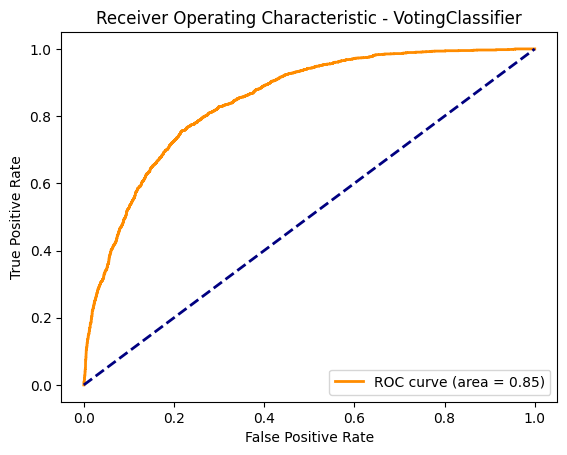

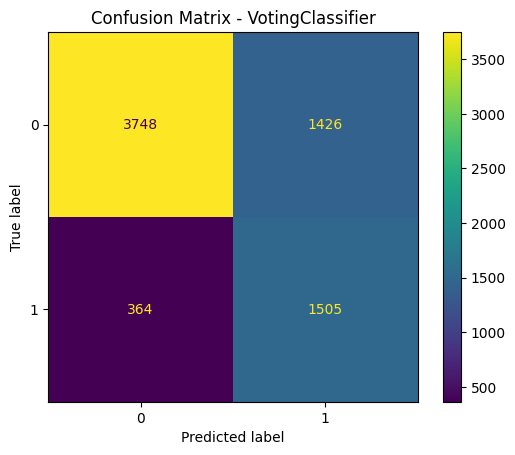

In [ ]:
# Step 6: Perform cross-validation and visualize ROC curve and confusion matrix
from sklearn.metrics import roc_auc_score

print("\nPerforming cross-validation to generate ROC curve and confusion matrix")
# For ROC curve, we need predicted probabilities
if hasattr(best_model, "predict_proba"):
    y_proba = cross_val_predict(best_model, X, y, cv=cv, method='predict_proba', n_jobs=-1)
    y_pred = cross_val_predict(best_model, X, y, cv=cv, method='predict', n_jobs=-1)
    fpr, tpr, thresholds = roc_curve(y, y_proba[:, 1])
    roc_auc = auc(fpr, tpr)

    # Plot ROC curve
    plt.figure()
    plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(f'Receiver Operating Characteristic - {best_model_name}')
    plt.legend(loc="lower right")
    plt.show()
else:
    print(f"{best_model_name} does not support predict_proba; ROC curve cannot be generated.")
    y_pred = cross_val_predict(best_model, X, y, cv=cv, method='predict', n_jobs=-1)
# Compute confusion matrix
cm = confusion_matrix(y, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.title(f'Confusion Matrix - {best_model_name}')
plt.show()

In [11]:
with open(f"/content/data/MyDrive/models/hard_voting.pkl", 'rb') as f:
    model = pickle.load(f)

NameError: name 'pickle' is not defined

In [ ]:
# Step 7: Train the final model on the entire dataset
print(f"\nTraining the final model ({best_model_name}) on the entire dataset")
best_model.fit(X, y)

# Save the trained final model
with open(f"{best_model_name}_final.pkl", 'wb') as f:
    pickle.dump(best_model, f)
print(f"Final model saved as {best_model_name}_final.pkl")

In [ ]:
# Step 8: Use the final model to make predictions on a new dataset
# Load new dataset
test_df = pd.read_csv(DATA_PATH / 'modified_telco_customer_data.csv')
test_df = test_df.drop(columns=['Churn'])
X_test = test_df.copy()

# Make predictions
print("\nMaking predictions on the new dataset")
y_test_pred = best_model.predict(X_test)

# Save predictions to CSV
test_predictions = pd.DataFrame({'Prediction': y_test_pred})
test_predictions.to_csv('test_predictions.csv', index=False)
print("Predictions saved to 'test_predictions.csv'")

## 이전거

In [ ]:
# 1차 데이터 전처리 파이프라인 (SelectKBest 사용)
pipeline = Pipeline([
    ('data_cleaning', DataCleaning()),
    ('feature_engineering', FeatureEngineering()),
    ('scaling_transforming', ScaleAndTransform(degree=2)),
    ('smote', SMOTE(random_state=42)),
    ('constant_filter', VarianceThreshold(threshold=0.01)),
    ('correlation_filter', CorrelationFilter(threshold=0.9)),
    ('select-k-best', SelectKBest(f_classif, k=50)),
    ('clf', RandomForestClassifier(random_state=42))
])

In [ ]:
def collect_selected_features(pipeline, X, y, cv=5):
    results = cross_validate(pipeline, X, y, cv=cv, return_estimator=True, scoring='accuracy')

    selected_feature_sets = []
    for i, est in enumerate(results['estimator']):
        select_k_best = est.named_steps['select-k-best']
        selected_features = select_k_best.selected_features_
        selected_feature_sets.append(set(selected_features))

        print(f"Fold {i+1}에서 선택된 피처: {selected_features}")

    return selected_feature_sets

# 모든 폴드에서 공통으로 선택된 피처를 찾는 함수
def get_common_features(selected_feature_sets):
    common_features = set.intersection(*selected_feature_sets)
    return list(common_features)

In [ ]:
# 교차 검증을 통해 선택된 피처들을 수집
selected_feature_sets = collect_selected_features(pipeline, X, y, cv=10)

# 모든 폴드에서 공통으로 선택된 피처들만 추출
common_features = get_common_features(selected_feature_sets)

print("모든 폴드에서 공통으로 선택된 피처:")
print(common_features)

(6338, 496)
2 (9312, 189)
(705, 496)
2 (705, 189)
(6338, 496)
2 (9312, 185)
(705, 496)
2 (705, 185)
(6338, 496)
2 (9312, 189)
(705, 496)
2 (705, 189)
(6339, 496)
2 (9312, 188)
(704, 496)
2 (704, 188)
(6339, 496)
2 (9314, 185)
(704, 496)
2 (704, 185)
(6339, 496)
2 (9314, 187)
(704, 496)
2 (704, 187)
(6339, 496)
2 (9314, 187)
(704, 496)
2 (704, 187)
(6339, 496)
2 (9314, 186)
(704, 496)
2 (704, 186)
(6339, 496)
2 (9314, 187)
(704, 496)
2 (704, 187)
(6339, 496)
2 (9314, 189)
(704, 496)
2 (704, 189)
Fold 1에서 선택된 피처: [0, 1, 3, 5, 6, 7, 8, 9, 10, 11, 13, 17, 20, 21, 63, 72, 74, 88, 89, 98, 99, 116, 127, 141, 150, 154, 205, 206, 214, 215, 221, 228, 230, 233, 234, 237, 255, 270, 271, 288, 289, 294, 328, 329, 332, 366, 398, 436, 450, 459]
Fold 2에서 선택된 피처: [0, 1, 3, 5, 6, 7, 8, 9, 10, 11, 13, 17, 20, 21, 63, 72, 73, 74, 88, 89, 98, 99, 116, 127, 141, 150, 154, 205, 206, 214, 215, 221, 230, 233, 234, 237, 270, 271, 288, 289, 294, 328, 329, 332, 366, 398, 436, 449, 450, 459]
Fold 3에서 선택된 피처: [0, 1,

In [ ]:
# FeatureSelection을 사용하여 파이프라인 업데이트
pipeline = Pipeline([
    ('data_cleaning', DataCleaning()),
    ('feature_engineering', FeatureEngineering()),
    ('scaling_transforming', ScaleAndTransform(degree=2)),
    ('constant_filter', VarianceThreshold(threshold=0.01)),
    ('correlation_filter', CorrelationFilter(threshold=0.9)),
    ('feature-select', FeatureSelection(features_to_select=common_features)),
    ('clf', RandomForestClassifier(random_state=42))
])

In [ ]:
from sklearn.model_selection import cross_validate

def check_feature_consistency_after_feature_select(estimator, X, y, cv=10):
    # 피처의 일관성을 확인할 리스트
    selected_feature_sets = []

    # 교차 검증 시행
    results = cross_validate(estimator, X, y, cv=cv, return_estimator=True, scoring='accuracy')

    for i, est in enumerate(results['estimator']):
        # 각 fold에서 FeatureSelection 이후 선택된 피처 추출
        selected_features = est.named_steps['feature-select'].features_to_select
        selected_feature_sets.append(set(selected_features))

        # 선택된 피처를 출력
        print(f"Fold {i+1}에서 선택된 피처: {selected_features}")

        # 이전 fold와의 피처 일관성 확인
        if i > 0:
            if selected_feature_sets[i] == selected_feature_sets[i-1]:
                print(f"Fold {i+1}와 Fold {i}의 피처가 동일합니다.")
            else:
                print(f"Fold {i+1}와 Fold {i}의 피처가 다릅니다.")

    return results

# 피처 일관성 확인 함수 실행
results = check_feature_consistency_after_feature_select(pipeline, X, y, cv=10)

In [ ]:
from sklearn.model_selection import cross_validate

def check_feature_consistency_after_feature_select(estimator, X, y, cv=10):
    # 피처의 일관성을 확인할 리스트
    selected_feature_sets = []

    # 교차 검증 시행
    results = cross_validate(estimator, X, y, cv=cv, return_estimator=True, scoring='accuracy')

    for i, est in enumerate(results['estimator']):
        # 각 fold에서 FeatureSelection 이후 선택된 피처 추출
        selected_features = est.named_steps['feature-select'].features_to_select
        selected_feature_sets.append(set(selected_features))

        # 선택된 피처를 출력
        print(f"Fold {i+1}에서 선택된 피처: {selected_features}")

        # 이전 fold와의 피처 일관성 확인
        if i > 0:
            if selected_feature_sets[i] == selected_feature_sets[i-1]:
                print(f"Fold {i+1}와 Fold {i}의 피처가 동일합니다.")
            else:
                print(f"Fold {i+1}와 Fold {i}의 피처가 다릅니다.")

    return results

# 피처 일관성 확인 함수 실행
results = check_feature_consistency_after_feature_select(pipeline, X, y, cv=10)


(6338, 496)
2 (9312, 189)
(705, 496)
2 (705, 189)
(6338, 496)
2 (9312, 185)
(705, 496)
2 (705, 185)
(6338, 496)
2 (9312, 189)
(705, 496)
2 (705, 189)
(6339, 496)
2 (9312, 188)
(704, 496)
2 (704, 188)
(6339, 496)
2 (9314, 185)
(704, 496)
2 (704, 185)
(6339, 496)
2 (9314, 187)
(704, 496)
2 (704, 187)
(6339, 496)
2 (9314, 187)
(704, 496)
2 (704, 187)
(6339, 496)
2 (9314, 186)
(704, 496)
2 (704, 186)
(6339, 496)
2 (9314, 187)
(704, 496)
2 (704, 187)
(6339, 496)
2 (9314, 189)
(704, 496)
2 (704, 189)
Fold 1에서 선택된 피처: [0, 3, 5, 6, 8, 9, 10, 11, 13, 141, 270, 271, 17, 398, 20, 21, 150, 154, 288, 289, 294, 436, 63, 450, 72, 328, 74, 329, 332, 205, 206, 214, 215, 88, 89, 98, 230, 233, 234, 237, 366, 116, 127]
Fold 2에서 선택된 피처: [0, 3, 5, 6, 8, 9, 10, 11, 13, 141, 270, 271, 17, 398, 20, 21, 150, 154, 288, 289, 294, 436, 63, 450, 72, 328, 74, 329, 332, 205, 206, 214, 215, 88, 89, 98, 230, 233, 234, 237, 366, 116, 127]
Fold 2와 Fold 1의 피처가 동일합니다.
Fold 3에서 선택된 피처: [0, 3, 5, 6, 8, 9, 10, 11, 13, 141, 27

In [ ]:
from sklearn.model_selection import StratifiedKFold, cross_val_score

# StratifiedKFold를 사용하여 교차 검증 설정
cv = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)

# cross_val_score를 사용하여 성능 평가
scores = cross_val_score(pipeline, X, y, cv=cv, scoring='f1')

# 각 fold에 대한 F1 스코어 출력
print("F1 scores for each fold:", scores)

# 평균 F1 스코어 출력
print("Mean F1 score:", scores.mean())

(6338, 496)
2 (9312, 187)
(705, 496)
2 (705, 187)
(6338, 496)
2 (9312, 187)
(705, 496)
2 (705, 187)
(6338, 496)
2 (9312, 189)
(705, 496)
2 (705, 189)
(6339, 496)
2 (9312, 187)
(704, 496)
2 (704, 187)
(6339, 496)
2 (9314, 186)
FeatureSelection fit 단계에서 누락된 피처: {366}
FeatureSelection transform 단계에서 누락된 피처: {366}
(6339, 496)
2 (9314, 186)
(704, 496)
2 (704, 186)
(6339, 496)
2 (9314, 187)
(704, 496)
2 (704, 187)
(6339, 496)
2 (9314, 187)
(704, 496)
2 (704, 187)
(6339, 496)
2 (9314, 188)
(704, 496)
2 (704, 188)
(6339, 496)
2 (9314, 186)
(704, 496)
2 (704, 186)
F1 scores for each fold: [0.58659218 0.52542373 0.56521739 0.58082192        nan 0.56410256
 0.52010724 0.54819277 0.56989247 0.53225806]
Mean F1 score: nan


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:425: FitFailedWarning: 
1 fits failed out of a total of 10.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
1 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 729, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 1152, in wrapper
    return fit_method(estimator, *args, **kwargs)
  File "/usr/local/lib/python3.10/dist-packages/imblearn/pipeline.py", line 329, in fit
    Xt, yt = self._fit(X, y, routed_params)
  File "/usr/local/lib/python3.10/dist-packages/

In [ ]:
# StratifiedKFold를 사용하여 교차 검증 설정 (클래스 불균형이 있을 경우 사용 권장)
cv = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)

# cross_val_score를 사용하여 성능 평가 (F1 스코어 사용)
scores = cross_val_score(pipeline, X, y, cv=cv, scoring='f1')

# 각 fold에 대한 F1 스코어 출력
print("F1 scores for each fold:", scores)

# 평균 F1 스코어 출력
print("Mean F1 score:", scores.mean())

(6338, 496)
2 (9312, 187)
(705, 496)
2 (705, 187)
(6338, 496)
2 (9312, 187)
(705, 496)
2 (705, 187)
(6338, 496)
2 (9312, 189)
(705, 496)
2 (705, 189)
(6339, 496)
2 (9312, 187)
(704, 496)
2 (704, 187)
(6339, 496)
2 (9314, 186)
(6339, 496)
2 (9314, 186)
(704, 496)
2 (704, 186)
(6339, 496)
2 (9314, 187)
(704, 496)
2 (704, 187)
(6339, 496)
2 (9314, 187)
(704, 496)
2 (704, 187)
(6339, 496)
2 (9314, 188)
(704, 496)
2 (704, 188)
(6339, 496)
2 (9314, 186)
(704, 496)
2 (704, 186)
F1 scores for each fold: [0.58659218 0.52542373 0.56521739 0.58082192        nan 0.56410256
 0.52010724 0.54819277 0.56989247 0.53225806]
Mean F1 score: nan


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:425: FitFailedWarning: 
1 fits failed out of a total of 10.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
1 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 729, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 1152, in wrapper
    return fit_method(estimator, *args, **kwargs)
  File "/usr/local/lib/python3.10/dist-packages/imblearn/pipeline.py", line 329, in fit
    Xt, yt = self._fit(X, y, routed_params)
  File "/usr/local/lib/python3.10/dist-packages/

In [ ]:
# StratifiedKFold를 사용하여 교차 검증 설정 (클래스 불균형이 있을 경우 사용 권장)
cv = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)

# cross_val_score를 사용하여 성능 평가 (F1 스코어 사용)
scores = cross_val_score(pipeline, X, y, cv=cv, scoring='f1')

# 각 fold에 대한 F1 스코어 출력
print("F1 scores for each fold:", scores)

# 평균 F1 스코어 출력
print("Mean F1 score:", scores.mean())

(6338, 496)
2 (6338, 198)
(705, 496)
2 (705, 198)
(6338, 496)
2 (6338, 200)
(705, 496)
2 (705, 200)
(6338, 496)
2 (6338, 199)
(705, 496)
2 (705, 199)
(6339, 496)
2 (6339, 200)
(704, 496)
2 (704, 200)
(6339, 496)
2 (6339, 201)
(704, 496)
2 (704, 201)
(6339, 496)
2 (6339, 201)
(704, 496)
2 (704, 201)
(6339, 496)
2 (6339, 202)
(704, 496)
2 (704, 202)
(6339, 496)
2 (6339, 200)
(704, 496)
2 (704, 200)
(6339, 496)
2 (6339, 203)
(704, 496)
2 (704, 203)
(6339, 496)
2 (6339, 201)
(704, 496)
2 (704, 201)
F1 scores for each fold: [0.61052632 0.57381616 0.57281553 0.58115183 0.58163265 0.55874674
 0.54025974 0.53932584 0.5914787  0.56692913]
Mean F1 score: 0.5716682641129791


In [ ]:
# 0.01
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold

# StratifiedKFold를 사용하여 교차 검증 설정 (클래스 불균형이 있을 경우 사용 권장)
cv = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)

# cross_val_score를 사용하여 성능 평가 (F1 스코어 사용)
scores = cross_val_score(pipeline, X, y, cv=cv, scoring='f1')

# 각 fold에 대한 F1 스코어 출력
print("F1 scores for each fold:", scores)

# 평균 F1 스코어 출력
print("Mean F1 score:", scores.mean())

In [ ]:
# 0.01
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold

# StratifiedKFold를 사용하여 교차 검증 설정 (클래스 불균형이 있을 경우 사용 권장)
cv = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)

# cross_val_score를 사용하여 성능 평가 (F1 스코어 사용)
scores = cross_val_score(pipeline, X, y, cv=cv, scoring='f1')

# 각 fold에 대한 F1 스코어 출력
print("F1 scores for each fold:", scores)

# 평균 F1 스코어 출력
print("Mean F1 score:", scores.mean())

(6338, 496)
1 (6338, 62)
2 (6338, 54)
(705, 496)
1 (705, 62)
2 (705, 54)
(6338, 496)
1 (6338, 61)
2 (6338, 55)
(705, 496)
1 (705, 61)
2 (705, 55)
(6338, 496)
1 (6338, 62)
2 (6338, 55)
(705, 496)
1 (705, 62)
2 (705, 55)
(6339, 496)
1 (6339, 61)
2 (6339, 54)
(704, 496)
1 (704, 61)
2 (704, 54)
(6339, 496)
1 (6339, 60)
2 (6339, 53)
(704, 496)
1 (704, 60)
2 (704, 53)
(6339, 496)
1 (6339, 60)
2 (6339, 53)
(704, 496)
1 (704, 60)
2 (704, 53)
(6339, 496)
1 (6339, 62)
2 (6339, 56)
(704, 496)
1 (704, 62)
2 (704, 56)
(6339, 496)
1 (6339, 59)
2 (6339, 53)
(704, 496)
1 (704, 59)
2 (704, 53)
(6339, 496)
1 (6339, 63)
2 (6339, 57)
(704, 496)
1 (704, 63)
2 (704, 57)
(6339, 496)
1 (6339, 63)
2 (6339, 56)
(704, 496)
1 (704, 63)
2 (704, 56)
F1 scores for each fold: [0.60215054 0.58333333 0.58097686 0.55172414 0.61455526 0.55331412
 0.53684211 0.58479532 0.60103627 0.53804348]
Mean F1 score: 0.574677142434565


In [ ]:
# 0.009
# StratifiedKFold를 사용하여 교차 검증 설정 (클래스 불균형이 있을 경우 사용 권장)
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# cross_val_score를 사용하여 성능 평가 (F1 스코어 사용)
scores = cross_val_score(pipeline, X, y, cv=cv, scoring='f1')

# 각 fold에 대한 F1 스코어 출력
print("F1 scores for each fold:", scores)

# 평균 F1 스코어 출력
print("Mean F1 score:", scores.mean())

F1 scores for each fold: [0.60392157 0.57929227 0.59677419 0.56875834 0.57351154]
Mean F1 score: 0.5844515834271303


In [ ]:
# 0.008
# StratifiedKFold를 사용하여 교차 검증 설정 (클래스 불균형이 있을 경우 사용 권장)
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# cross_val_score를 사용하여 성능 평가 (F1 스코어 사용)
scores = cross_val_score(pipeline, X, y, cv=cv, scoring='f1')

# 각 fold에 대한 F1 스코어 출력
print("F1 scores for each fold:", scores)

# 평균 F1 스코어 출력
print("Mean F1 score:", scores.mean())

F1 scores for each fold: [0.61640212 0.57029178 0.58964143 0.55769231 0.58426966]
Mean F1 score: 0.5836594596934099


In [ ]:
# 0.007
# StratifiedKFold를 사용하여 교차 검증 설정 (클래스 불균형이 있을 경우 사용 권장)
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# cross_val_score를 사용하여 성능 평가 (F1 스코어 사용)
scores = cross_val_score(pipeline, X, y, cv=cv, scoring='f1')

# 각 fold에 대한 F1 스코어 출력
print("F1 scores for each fold:", scores)

# 평균 F1 스코어 출력
print("Mean F1 score:", scores.mean())

F1 scores for each fold: [0.60183968 0.55851064 0.5897772  0.56388889 0.59445844]
Mean F1 score: 0.5816949690762381


In [ ]:
# 0.006
# StratifiedKFold를 사용하여 교차 검증 설정 (클래스 불균형이 있을 경우 사용 권장)
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# cross_val_score를 사용하여 성능 평가 (F1 스코어 사용)
scores = cross_val_score(pipeline, X, y, cv=cv, scoring='f1')

# 각 fold에 대한 F1 스코어 출력
print("F1 scores for each fold:", scores)

# 평균 F1 스코어 출력
print("Mean F1 score:", scores.mean())

F1 scores for each fold: [0.60288336 0.5859375  0.584      0.5625879  0.59278351]
Mean F1 score: 0.5856384529383257


In [ ]:
# 0.006 10
# StratifiedKFold를 사용하여 교차 검증 설정 (클래스 불균형이 있을 경우 사용 권장)
cv = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)

# cross_val_score를 사용하여 성능 평가 (F1 스코어 사용)
scores = cross_val_score(pipeline, X, y, cv=cv, scoring='f1')

# 각 fold에 대한 F1 스코어 출력
print("F1 scores for each fold:", scores)

# 평균 F1 스코어 출력
print("Mean F1 score:", scores.mean())

KeyboardInterrupt: 

In [ ]:
# 0.005
# StratifiedKFold를 사용하여 교차 검증 설정 (클래스 불균형이 있을 경우 사용 권장)
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# cross_val_score를 사용하여 성능 평가 (F1 스코어 사용)
scores = cross_val_score(pipeline, X, y, cv=cv, scoring='f1')

# 각 fold에 대한 F1 스코어 출력
print("F1 scores for each fold:", scores)

# 평균 F1 스코어 출력
print("Mean F1 score:", scores.mean())

F1 scores for each fold: [0.60858257 0.56443299 0.59007833 0.55437666 0.60447761]
Mean F1 score: 0.5843896326420218


# HPO

In [ ]:
!pip install ray[tune]

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 101.7/101.7 kB 3.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 65.4/65.4 MB 7.9 MB/s eta 0:00:00


In [ ]:
# RandomSearch HPO 수정 (F1 스코어)
class RandomSearchHPO:
    def __init__(self, pipeline, param_distributions, n_iter=10, cv=5, random_state=42):
        self.pipeline = pipeline
        self.param_distributions = param_distributions
        self.n_iter = n_iter
        self.cv = cv
        self.random_state = random_state
        self.search = None

    def fit(self, X, y):
        self.search = RandomizedSearchCV(self.pipeline, self.param_distributions, n_iter=self.n_iter, cv=self.cv,
                                         scoring='f1', random_state=self.random_state, verbose=2, n_jobs=-1)
        self.search.fit(X, y)
        return self.search.best_params_, self.search.best_score_

# Optuna HPO 수정 (F1 스코어)
class OptunaHPO:
    def __init__(self, pipeline, X, y, cv=5, initial_params=None, n_trials=50):
        self.pipeline = pipeline
        self.X = X
        self.y = y
        self.n_trials = n_trials
        self.cv = cv
        self.initial_params = initial_params
        self.study = None

    def objective(self, trial):
        # Optuna를 사용한 HPO에서의 하이퍼파라미터 범위 정의
        n_estimators = trial.suggest_int('clf__n_estimators',
                                         self.initial_params['clf__n_estimators'] - 50,
                                         self.initial_params['clf__n_estimators'] + 50)
        max_depth = trial.suggest_int('clf__max_depth',
                                      self.initial_params['clf__max_depth'] - 5,
                                      self.initial_params['clf__max_depth'] + 5)

        # 파이프라인에 하이퍼파라미터 적용
        self.pipeline.set_params(clf__n_estimators=n_estimators,
                                 clf__max_depth=max_depth)

        # ROC-AUC 스코어를 사용한 성능 평가
        score = cross_val_score(self.pipeline, self.X, self.y, cv=self.cv, scoring='f1', n_jobs=-1)
        return score.mean()

    def fit(self):
        self.study = optuna.create_study(direction='maximize')

        # tqdm으로 진행 상황 출력
        for trial_idx in tqdm(range(1, self.n_trials + 1), desc="Optuna Trials"):
            self.study.optimize(self.objective, n_trials=1, n_jobs=-1)

        return self.study.best_params, self.study.best_value

In [ ]:
X_s = DataCleaning().fit_transform(X)

In [ ]:
X_c = FeatureEngineering().fit_transform(X_s)

각 피처별 무한대 값 개수:
tenure                    0
MonthlyCharges            0
TotalCharges              0
LongTermCustomer          0
AvgMonthlyCharges         0
MultipleServices          0
FixedContract             0
IsPaperless               0
AutoPayment               0
TotalServicesUsed         0
AboveAverageCharges       0
IsFiberOptic              0
TechSupportSecurity       0
IsElectronicCheck         0
IsHighMonthlyCharge       0
UsesMultipleServices      0
ShortTermContract         0
ContractEndingSoon        0
HighChargeVolatility      0
SingleServiceCustomer     0
ServiceRisk               0
PaperlessManualBilling    0
RenewedContract           0
ChargeIncreaseRate        0
LongTermLowCharge         0
ServiceUpgrade            0
LoyaltyScore              0
DigitalSavvyCustomer      0
dtype: int64
각 피처별 결측치 개수:
gender                    0
SeniorCitizen             0
Partner                   0
Dependents                0
tenure                    0
PhoneService              0
Multi

In [ ]:
X_z = ScaleAndTransform().fit_transform(X_c)

In [ ]:
X_z.shape

(7043, 496)

In [ ]:
# RandomSearch HPO 설정
param_distributions = {
    'clf__n_estimators': [50, 100, 150, 200],  # 랜덤 포레스트의 트리 개수
    'clf__max_depth': [5, 10, 15, 20]  # 트리의 최대 깊이
}

# RandomSearch HPO 실행
random_search_hpo = RandomSearchHPO(pipeline, param_distributions)
best_params, best_score = random_search_hpo.fit(X, y)
print(f"Random Search Best Params: {best_params}, Best Score: {best_score}")


Fitting 5 folds for each of 10 candidates, totalling 50 fits
Random Search Best Params: {'clf__n_estimators': 100, 'clf__max_depth': 10}, Best Score: 0.5952641432724624


In [ ]:
# Optuna HPO 실행 (RandomSearch로 찾은 best_params를 초기값으로 사용)
optuna_hpo = OptunaHPO(pipeline, X, y, initial_params=best_params)  # 초기값으로 RandomSearch 결과 전달
best_params_optuna, best_score_optuna = optuna_hpo.fit()
print(f"Optuna Best Params: {best_params_optuna}, Best Score: {best_score_optuna}")

[I 2024-09-19 07:13:15,108] A new study created in memory with name: no-name-a4ebdd67-7852-4ae5-a91b-3e51c3bd433f
Optuna Trials:   0%|          | 0/50 [00:00<?, ?it/s][I 2024-09-19 07:13:51,771] Trial 2 finished with value: 0.7989005417699983 and parameters: {'clf__n_estimators': 137, 'clf__max_depth': 9}. Best is trial 2 with value: 0.7989005417699983.
[I 2024-09-19 07:13:53,887] Trial 0 finished with value: 0.794297977097195 and parameters: {'clf__n_estimators': 140, 'clf__max_depth': 12}. Best is trial 0 with value: 0.794297977097195.
Optuna Trials: 100%|██████████| 50/50 [18:24<00:00, 22.08s/it]

Optuna Best Params: {'clf__n_estimators': 86, 'clf__max_depth': 5}, Best Score: 0.8035003201822146


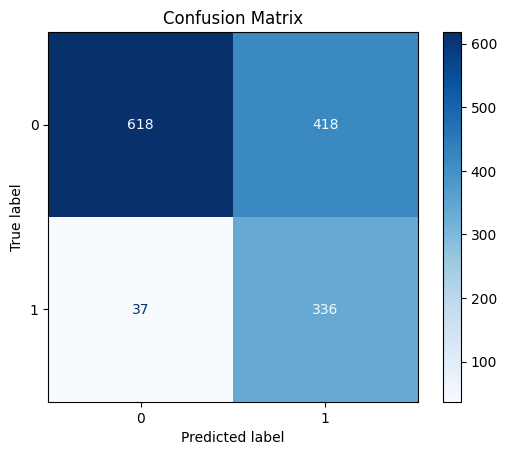

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.model_selection import train_test_split

# 데이터 분할 (훈련: 80%, 테스트: 20%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 최적의 하이퍼파라미터로 모델 훈련
pipeline.set_params(**best_params_optuna)  # Optuna로 찾은 최적의 하이퍼파라미터 사용
pipeline.fit(X, y)

# 예측 수행
y_pred = pipeline.predict(X_test)

# 혼동행렬 계산
conf_matrix = confusion_matrix(y_test, y_pred)

# 혼동행렬 시각화
ConfusionMatrixDisplay(conf_matrix).plot(cmap='Blues')
plt.title('Confusion Matrix')
plt.show()

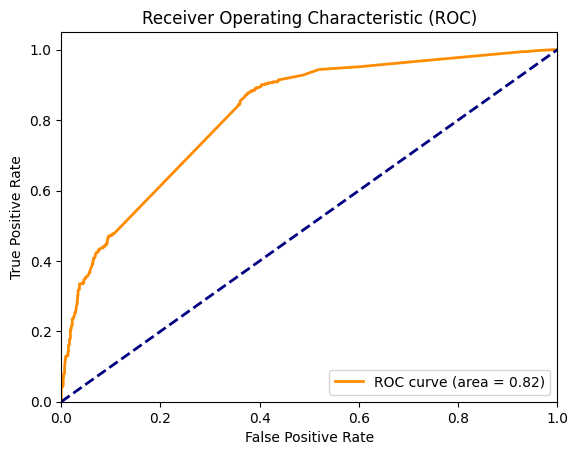

In [ ]:
from sklearn.metrics import roc_curve, auc

# ROC AUC 계산
y_pred_prob = pipeline.predict_proba(X_test)[:, 1]  # 양성 클래스의 확률 값만 사용
fpr, tpr, _ = roc_curve(y_test, y_pred_prob)
roc_auc = auc(fpr, tpr)

# ROC 곡선 시각화
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc="lower right")
plt.show()